<a href="https://colab.research.google.com/github/atirut-sud/Customer-Churn-Sales-Forecasting-E-Commerce-Dataset-/blob/main/E_com_bar2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install tpot

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 7.8 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11939 sha256=0e99e4f5403c5e2fd595b292cb518a72e2880ff06cf98443be7bc4ee20249256
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


#✓ **ติดตั้ง library และ โหลดชุดข้อมูล**

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
from mpl_toolkits.mplot3d import Axes3D

import json
import requests
import folium

from tpot import TPOTClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve

from sklearn.cluster import KMeans
import re
from nltk.corpus import stopwords
from nltk.stem import RSLPStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import joblib

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb

print("ทุกไลบรารีถูกติดตั้งเรียบร้อยแล้ว!")

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning:


Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.




ทุกไลบรารีถูกติดตั้งเรียบร้อยแล้ว!


In [ ]:

# Reading all the files
raw_path = '/content/drive/MyDrive/Brazilian E_Commerce Public Dataset by Olist/'
olist_customer = pd.read_csv(raw_path + 'olist_customers_dataset.csv')
olist_geolocation = pd.read_csv(raw_path + 'olist_geolocation_dataset.csv')
olist_orders = pd.read_csv(raw_path + 'olist_orders_dataset.csv')
olist_order_items = pd.read_csv(raw_path + 'olist_order_items_dataset.csv')
olist_order_payments = pd.read_csv(raw_path + 'olist_order_payments_dataset.csv')
olist_order_reviews = pd.read_csv(raw_path + 'olist_order_reviews_dataset.csv')
olist_products = pd.read_csv(raw_path + 'olist_products_dataset.csv')
olist_sellers = pd.read_csv(raw_path + 'olist_sellers_dataset.csv')
product_translation = pd.read_csv(raw_path + 'product_category_name_translation.csv')


In [ ]:
olist_customer.head(10)

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   
5  879864dab9bc3047522c92c82e1212b8  4c93744516667ad3b8f1fb645a3116a4   
6  fd826e7cf63160e536e0908c76c3f441  addec96d2e059c80c30fe6871d30d177   
7  5e274e7a0c3809e14aba7ad5aae0d407  57b2a98a409812fe9618067b6b8ebe4f   
8  5adf08e34b2e993982a47070956c5c65  1175e95fb47ddff9de6b2b06188f7e0d   
9  4b7139f34592b3a31687243a302fa75b  9afe194fb833f79e300e37e580171f22   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  
5                     89254         jaragua do sul             SC  
6                      4534              sao paulo             SP  
7                     35182                timoteo             MG  
8                     81560               curitiba             PR  
9                     30575         belo horizonte             MG

# **ตรวจสอบข้อมูลเบื่อต้น**

In [ ]:
# Store DataFrames in a dictionary for easier processing
datasets = {
    'olist_customer': olist_customer,
    'olist_geolocation': olist_geolocation,
    'olist_orders': olist_orders,
    'olist_order_items': olist_order_items,
    'olist_order_payments': olist_order_payments,
    'olist_order_reviews': olist_order_reviews,
    'olist_products': olist_products,
    'olist_sellers': olist_sellers
}
##datasets (dict): ดิกชันนารีที่ประกอบด้วยชื่อชุดข้อมูลเป็นกุญแจและ DataFrame เป็นค่า

In [ ]:

def summarize_datasets(datasets):
    summary_list = []

    for name, df1 in datasets.items():
        n_rows = df1.shape[0]
        n_columns = df1.shape[1]
        n_missing_values = df1.isnull().sum().sum()
        columns_with_missing_values = df1.columns[df1.isnull().any()].tolist()

        summary_list.append({
            'Dataset': name,
            'Rows': n_rows,
            'Columns': n_columns,
            'Missing Values': n_missing_values,
            'Columns with Missing Values': ', '.join(columns_with_missing_values) if columns_with_missing_values else 'None'
        })

    summary_df = pd.DataFrame(summary_list)

    # เปลี่ยน 'None' เป็น 'ไม่มี'
    summary_df['Columns with Missing Values'] = summary_df['Columns with Missing Values'].replace('None', 'ไม่มี')

    # แต่งตาราง
    summary_df_style = summary_df.style.set_properties(**{
        'text-align': 'left',
        'padding': '8px'
    }).set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#0341fc'), ('color', 'white'), ('text-align', 'center'), ('padding', '10px')]},
        {'selector': 'td', 'props': [('border', '1px solid #dddddd'), ('text-align', 'center'), ('padding', '8px')]},
    ]).background_gradient(subset=['Rows', 'Columns', 'Missing Values'], cmap='Blues') \
      .format({
          'Rows': "{:,}",
          'Columns': "{:,}",
          'Missing Values': "{:,}"
      }).set_caption("สรุปชุดข้อมูล")

    return summary_df_style

In [ ]:
summary_df_style = summarize_datasets(datasets)
summary_df_style

In [ ]:
def generate_datasets_summary(datasets, calculate_entropy_flag=True):
    """
    สร้างตารางสรุปข้อมูลสำหรับหลายๆ DataFrame ภายในพจนานุกรม datasets

    Parameters:
    -----------
    datasets : dict
        พจนานุกรมที่เก็บ DataFrame ต่างๆ โดยที่ key คือชื่อ Dataset และ value คือ DataFrame
    calculate_entropy_flag : bool, default=True
        ตัวเลือกในการคำนวณค่า entropy ของแต่ละคอลัมน์

    Returns:
    --------
    summary_df : pd.DataFrame
        DataFrame ที่มีตารางสรุปข้อมูลทั้งหมดจากทุก Dataset
    """

    # ฟังก์ชันคำนวณ entropy สำหรับคอลัมน์
    def calculate_entropy_series(series, col_name):
        if series.empty:
            print(f"คอลัมน์ '{col_name}' ไม่มีข้อมูลหลังจากลบค่า NaN")
            return np.nan
        try:
            counts = series.value_counts(normalize=True)
            if counts.empty:
                print(f"คอลัมน์ '{col_name}' ไม่มีค่าหลังจากนับความถี่")
                return np.nan
            return round(entropy(counts, base=2), 2)
        except Exception as e:
            print(f"ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ '{col_name}': {e}")
            return np.nan

    # สร้างรายการเก็บสรุปข้อมูลทั้งหมด
    all_summaries = []

    for dataset_name, df in datasets.items():
        print(f"\n=== Processing Dataset: {dataset_name} ===")
        print(f"Dataset Shape: {df.shape}")

        # สร้าง DataFrame สรุปข้อมูลเบื้องต้น
        summary = pd.DataFrame(df.dtypes, columns=['dtypes']).reset_index().rename(columns={'index': 'Column'})
        summary['# Missing'] = df.isnull().sum().values
        summary['# Unique'] = df.nunique().values

        # ดึงตัวอย่างข้อมูลจากแถวแรก หาก DataFrame ไม่ว่างเปล่า
        if not df.empty:
            summary['Example'] = df.iloc[0].values
        else:
            summary['Example'] = np.nan

        # คำนวณค่า Entropy สำหรับแต่ละคอลัมน์
        if calculate_entropy_flag:
            summary['Entropy'] = summary['Column'].apply(
                lambda col: calculate_entropy_series(df[col].dropna(), col)
            )
        else:
            summary['Entropy'] = np.nan

        # เพิ่มคอลัมน์ชื่อ Dataset
        summary['Dataset'] = dataset_name

        # จัดเรียงคอลัมน์ให้เป็นระเบียบ
        summary = summary[['Dataset', 'Column', 'dtypes', '# Missing', '# Unique', 'Example', 'Entropy']]

        # เพิ่มไปยังรายการทั้งหมด
        all_summaries.append(summary)

    # รวมสรุปทั้งหมดเข้าเป็น DataFrame เดียว
    summary_df = pd.concat(all_summaries, ignore_index=True)

    return summary_df

In [ ]:
generate_datasets_summary = generate_datasets_summary(datasets)
generate_datasets_summary


=== Processing Dataset: olist_customer ===
Dataset Shape: (99441, 5)
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'customer_id': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'customer_unique_id': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'customer_zip_code_prefix': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'customer_city': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'customer_state': name 'entropy' is not defined

=== Processing Dataset: olist_geolocation ===
Dataset Shape: (1000163, 5)
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'geolocation_zip_code_prefix': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'geolocation_lat': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'geolocation_lng': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'geolocation_city': name 'entropy' is not defined
ไม่สามารถคำนวณ entropy สำหรับคอลัมน์ 'geolocation_state': name 

Dataset                         Column   dtypes  # Missing  \
0         olist_customer                    customer_id   object          0   
1         olist_customer             customer_unique_id   object          0   
2         olist_customer       customer_zip_code_prefix    int64          0   
3         olist_customer                  customer_city   object          0   
4         olist_customer                 customer_state   object          0   
5      olist_geolocation    geolocation_zip_code_prefix    int64          0   
6      olist_geolocation                geolocation_lat  float64          0   
7      olist_geolocation                geolocation_lng  float64          0   
8      olist_geolocation               geolocation_city   object          0   
9      olist_geolocation              geolocation_state   object          0   
10          olist_orders                       order_id   object          0   
11          olist_orders                    customer_id   object          0   
12          olist_orders                   order_status   object          0   
13          olist_orders       order_purchase_timestamp   object          0   
14          olist_orders              order_approved_at   object        160   
15          olist_orders   order_delivered_carrier_date   object       1783   
16          olist_orders  order_delivered_customer_date   object       2965   
17          olist_orders  order_estimated_delivery_date   object          0   
18     olist_order_items                       order_id   object          0   
19     olist_order_items                  order_item_id    int64          0   
20     olist_order_items                     product_id   object          0   
21     olist_order_items                      seller_id   object          0   
22     olist_order_items            shipping_limit_date   object          0   
23     olist_order_items                          price  float64          0   
24     olist_order_items                  freight_value  float64          0   
25  olist_order_payments                       order_id   object          0   
26  olist_order_payments             payment_sequential    int64          0   
27  olist_order_payments                   payment_type   object          0   
28  olist_order_payments           payment_installments    int64          0   
29  olist_order_payments                  payment_value  float64          0   
30   olist_order_reviews                      review_id   object          0   
31   olist_order_reviews                       order_id   object          0   
32   olist_order_reviews                   review_score    int64          0   
33   olist_order_reviews           review_comment_title   object      87656   
34   olist_order_reviews         review_comment_message   object      58247   
35   olist_order_reviews           review_creation_date   object          0   
36   olist_order_reviews        review_answer_timestamp   object          0   
37        olist_products                     product_id   object          0   
38        olist_products          product_category_name   object        610   
39        olist_products            product_name_lenght  float64        610   
40        olist_products     product_description_lenght  float64        610   
41        olist_products             product_photos_qty  float64        610   
42        olist_products               product_weight_g  float64          2   
43        olist_products              product_length_cm  float64          2   
44        olist_products              product_height_cm  float64          2   
45        olist_products               product_width_cm  float64          2   
46         olist_sellers                      seller_id   object          0   
47         olist_sellers         seller_zip_code_prefix    int64          0   
48         olist_sellers                    seller_city   object          0   
49         olist_sellers                   seller_state   object   

# **ตรวจสอบ missing value, outliere, duplicates**
- ทำการรวมข้อมูลด้วย .merge() และใช้ .replace() เพื่อเปลี่ยนเครื่องหมายที่น่าจะเป็น misssing ให้เป็นค่า NA และจึงใช้ .isnull() เพื่อที่จะดูว่ามี order ไหนโดนผลกระทบจาก missing value บ้าง \
- แยก outliere ออกมาเพื่อนำมาวิเคราห์สาเหตุ \
- duplicates ทำการลบไปตั้งแต่ตอนรวมข้อมูล


In [ ]:

full_df_order = olist_orders

merge_operations = [
    (olist_order_reviews, 'order_id'),
    (olist_order_payments, 'order_id'),
    (olist_customer, 'customer_id'),
    (olist_order_items, 'order_id'),
    (olist_products, 'product_id'),
    (olist_sellers, 'seller_id')
]

for df, key in merge_operations:
    full_df_order = full_df_order.merge(df, on=key, how='left')

full_df_order .head(10)

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
5  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
6  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
7  a4591c265e18cb1dcee52889e2d8acc3  503740e9ca751ccdda7ba28e9ab8f608   
8  136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
9  6514b8ad8028c9f2cc2374ded245783f  9bdf08b4b3b52b5526ff42d37d47f222   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
5    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
6    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
7    delivered      2017-07-09 21:57:05  2017-07-09 22:10:13   
8     invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
9    delivered      2017-05-16 13:10:30  2017-05-16 13:22:11   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   
5          2017-11-22 13:39:59           2017-12-02 00:28:42   
6          2018-02-14 19:46:34           2018-02-16 18:17:02   
7          2017-07-11 14:58:04           2017-07-26 10:57:55   
8                          NaN                           NaN   
9          2017-05-22 10:07:46           2017-05-26 12:55:51   

  order_estimated_delivery_date                         review_id  \
0           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
1           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
2           2017-10-18 00:00:00  a54f0611adc9ed256b57ede6b6eb5114   
3           2018-08-13 00:00:00  8d5266042046a06655c8db133d120ba5   
4           2018-09-04 00:00:00  e73b67b67587f7644d5bd1a52deb1b01   
5           2017-12-15 00:00:00  359d03e676b3c069f62cadba8dd3f6e8   
6           2018-02-26 00:00:00  e50934924e227544ba8246aeb3770dd4   
7           2017-08-01 00:00:00  89b738e70a1ce346db29a20fb2910161   
8           2017-05-09 00:00:00  e07549ef5311abcc92ba1784b093fb56   
9           2017-06-07 00:00:00  07d67dd06ed5f88bef11ef6b464e79ae   

   review_score  ... product_name_lenght product_description_lenght  \
0           4.0  ...                40.0                      268.0   
1           4.0  ...                40.0                      268.0   
2           4.0  ...                40.0                      268.0   
3           4.0  ...                29.0                      178.0   
4           5.0  ...                46.0                      232.0   
5           5.0  ...                59.0                      468.0   
6           5.0  ...                38.0                      316.0   
7           4.0  ...                49.0                      608.0   
8           2.0  ...                 NaN                        NaN   
9           5.0  ...                59.0                      956.0   

  product_photos_qty product_weight_g  product_length_cm product_height_cm  \
0                4.0            500.0               19.0               8.0   
1                4.0            500.0               19.0               8.0   
2                4.0            500.0

In [ ]:
full_df_order = full_df_order.replace(["NA", "N/A", "NULL", "None", "NaN", "?", "-", "--", "---", "MISSING", "unknown", "Unknown", ".", "", " "], pd.NA)
full_df_order.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                   177
order_delivered_carrier_date       2086
order_delivered_customer_date      3421
order_estimated_delivery_date         0
review_id                           997
review_score                        997
review_comment_title             105169
review_comment_message            68972
review_creation_date                997
review_answer_timestamp             997
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
customer_unique_id                    0
customer_zip_code_prefix              0
customer_city                         0
customer_state                        0
order_item_id                       833
product_id                          833
seller_id                           833
shipping_limit_date                 833
price                               833
freight_value                       833
product_category_name              2542
product_name_lenght                2542
product_description_lenght         2542
product_photos_qty                 2542
product_weight_g                    853
product_length_cm                   853
product_height_cm                   853
product_width_cm                    853
seller_zip_code_prefix              833
seller_city                         833
seller_state                        833
dtype: int64

In [ ]:
numeric_columns = ['review_score', 'payment_sequential', 'payment_installments',
                   'payment_value', 'price', 'freight_value', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

(numeric_df) = full_df_order[numeric_columns]

def detect_outliers_iqr(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df < lower_bound) | (df > upper_bound)

    return outliers

detect_outliers_iqr(numeric_df).sum()


review_score                  19590
payment_sequential             5141
payment_installments           8153
payment_value                  9638
price                          8867
freight_value                 12740
product_name_lenght             804
product_description_lenght     7382
product_photos_qty             3205
product_weight_g              16696
product_length_cm              3822
product_height_cm              8101
product_width_cm               2754
dtype: int64

In [ ]:
def detect_outliers(df, column=None):

    df = df.copy()

    if column:
        if column not in df.columns:
            raise ValueError(f"คอลัมน์ '{column}' ไม่พบใน DataFrame")
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outlier_col = f'is_outlier_{column}'
        # ใช้ .loc ในการกำหนดค่าใหม่
        df.loc[:, outlier_col] = (df[column] < lower_bound) | (df[column] > upper_bound)
    else:
        numeric_cols = df.select_dtypes(include=['number']).columns
        for col in numeric_cols:
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outlier_col = f'is_outlier_{col}'
            df.loc[:, outlier_col] = (df[col] < lower_bound) | (df[col] > upper_bound)
    return df

detect_outliers(numeric_df)


review_score  payment_sequential  payment_installments  payment_value  \
0                4.0                 1.0                   1.0          18.12   
1                4.0                 3.0                   1.0           2.00   
2                4.0                 2.0                   1.0          18.59   
3                4.0                 1.0                   1.0         141.46   
4                5.0                 1.0                   3.0         179.12   
...              ...                 ...                   ...            ...   
119138           4.0                 1.0                   3.0         195.00   
119139           5.0                 1.0                   5.0         271.01   
119140           2.0                 1.0                   4.0         441.16   
119141           2.0                 1.0                   4.0         441.16   
119142           5.0                 1.0                   1.0          86.86   

         price  freight_value  product_name_lenght  \
0        29.99           8.72                 40.0   
1        29.99           8.72                 40.0   
2        29.99           8.72                 40.0   
3       118.70          22.76                 29.0   
4       159.90          19.22                 46.0   
...        ...            ...                  ...   
119138  174.90          20.10                 52.0   
119139  205.99          65.02                 51.0   
119140  179.99          40.59                 59.0   
119141  179.99          40.59                 59.0   
119142   68.50          18.36                 45.0   

        product_description_lenght  product_photos_qty  product_weight_g  ...  \
0                            268.0                 4.0             500.0  ...   
1                            268.0                 4.0             500.0  ...   
2                            268.0                 4.0             500.0  ...   
3                            178.0                 1.0             400.0  ...   
4                            232.0                 1.0             420.0  ...   
...                            ...                 ...               ...  ...   
119138                       828.0                 4.0            4950.0  ...   
119139                       500.0                 2.0           13300.0  ...   
119140                      1893.0                 1.0            6550.0  ...   
119141                      1893.0                 1.0            6550.0  ...   
119142                       569.0                 1.0             150.0  ...   

        is_outlier_payment_value  is_outlier_price  is_outlier_freight_value  \
0                          False             False                     False   
1                          False             False                     False   
2                          False             False                     False   
3                          False             False                     False   
4                          False             False                     False   
...                          ...               ...                       ...   
119138                     False             False                     False   
119139                     False             False                      True   
119140                      True             False                      True   
119141                      True             False                      True   
119142                     False             False                     False   

        is_outlier_product_name_lenght  is_outlier_product_description_lenght  \
0                                False                                  False   
1                                False                                  False   
2                                False                                  False   
3                                False                                  False   
4                                False         

# **วิเคราะห์สถิติเชิงพรรณนา**



In [ ]:
#olist_orders.head(3)
counts_order = pd.DataFrame(olist_orders['order_status'].value_counts())

counts_order


count
order_status       
delivered     96478
shipped        1107
canceled        625
unavailable     609
invoiced        314
processing      301
created           5
approved          2

<ipython-input-14-21ff985c378b>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




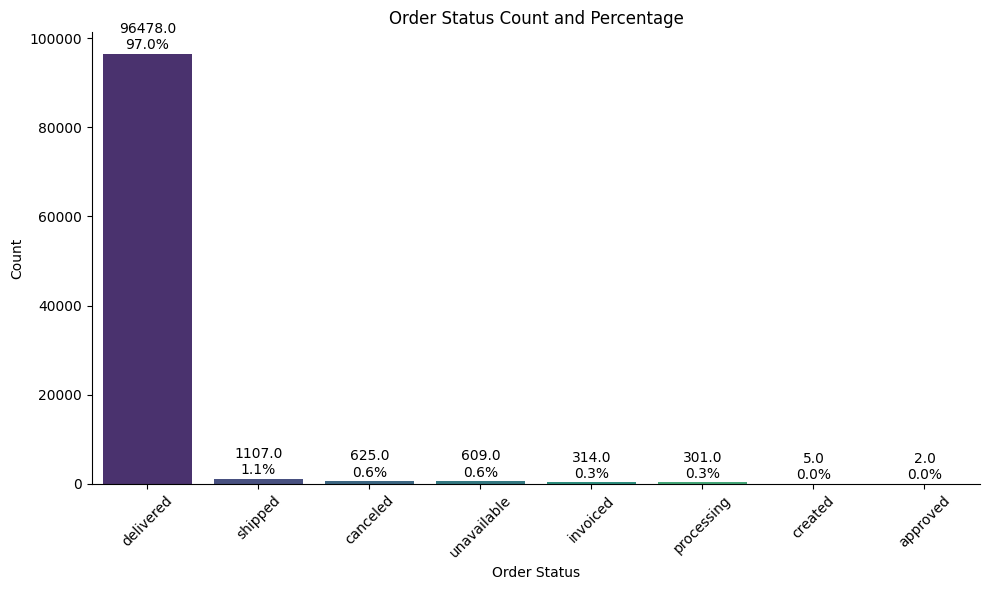

In [ ]:
total_orders = counts_order['count'].sum()
counts_order['percentage'] = (counts_order['count'] / total_orders) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='order_status', y='count', data=counts_order, palette='viridis')

for index, row in counts_order.iterrows():
    plt.text(index, row['count'] + (total_orders * 0.01), f'{row["count"]}\n{row["percentage"]:.1f}%', color='black', ha="center")

sns.despine(top=True)
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.title('Order Status Count and Percentage')
plt.xticks(rotation=45)  # หมุนชื่อแกน x 45องศา
plt.tight_layout()
plt.show()


In [ ]:
#ทำเป็นฟังชั่น

def plot_value_counts(ax, fd, column):
    # นับจำนวนค่าของแต่ละค่าที่อยู่ใน column ที่กำหนด
    df = pd.DataFrame(fd[column].value_counts()).reset_index()
    df.columns = [column, 'count']

    # คำนวณเปอร์เซ็นต์
    total_orders = df['count'].sum()
    df['percentage'] = (df['count'] / total_orders) * 100

    # สร้าง plot ลงใน axes ที่กำหนด
    sns.barplot(x=column, y='count', data=df, palette='viridis', ax=ax,order=df[column])

    # เพิ่มค่าและเปอร์เซ็นต์บน bar
    for index, row in df.iterrows():
        ax.text(index, row['count'] + (total_orders * 0.01),
                 f'{row["count"]}\n{row["percentage"]:.1f}%',
                 color='black', ha="center")

    # ปรับการแสดงผลของ plot
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Count')
    ax.set_title(f'{column.capitalize()} Count and Percentage')
    ax.tick_params(axis='x', rotation=45)  # หมุนชื่อแกน x 45 องศา
    sns.despine(ax=ax, top=True)


<ipython-input-15-dc9efe7b8de5>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-15-dc9efe7b8de5>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




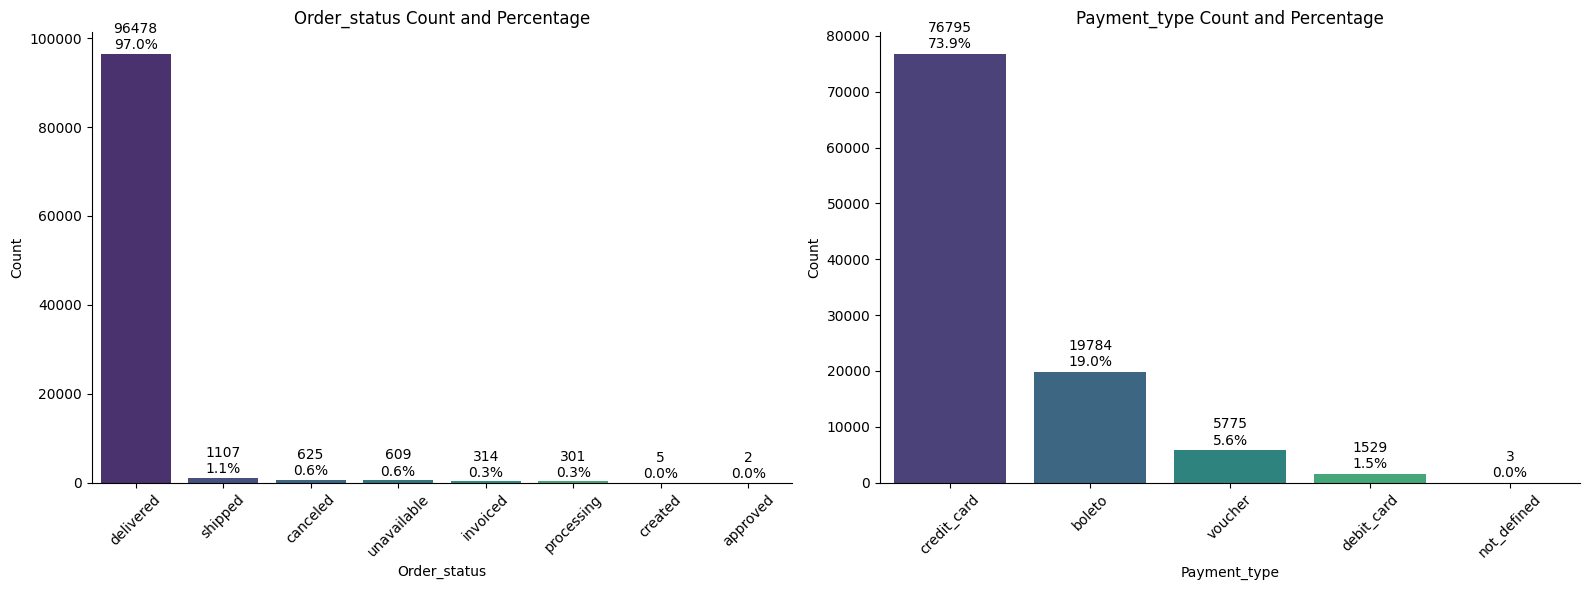

In [ ]:
fig, plot = plt.subplots(1, 2, figsize=(16, 6))  #แถว 2กราฟ ขนาด16*6

plot_value_counts(plot[0], olist_orders, 'order_status')
plot_value_counts(plot[1], olist_order_payments, 'payment_type')



plt.tight_layout()  # จัดเรียง layout ให้อัตโนมัติ
plt.show()

# **วิเคราะห์ความสัมพันธ์ระหว่างตัวแปร**

In [ ]:
numeric_columns = ['review_score', 'payment_sequential', 'payment_installments',
                   'payment_value', 'price', 'freight_value', 'product_name_lenght',
                   'product_description_lenght', 'product_photos_qty', 'product_weight_g',
                   'product_length_cm', 'product_height_cm', 'product_width_cm']

numeric_df = full_df_order[numeric_columns]
corr = numeric_df.corr()


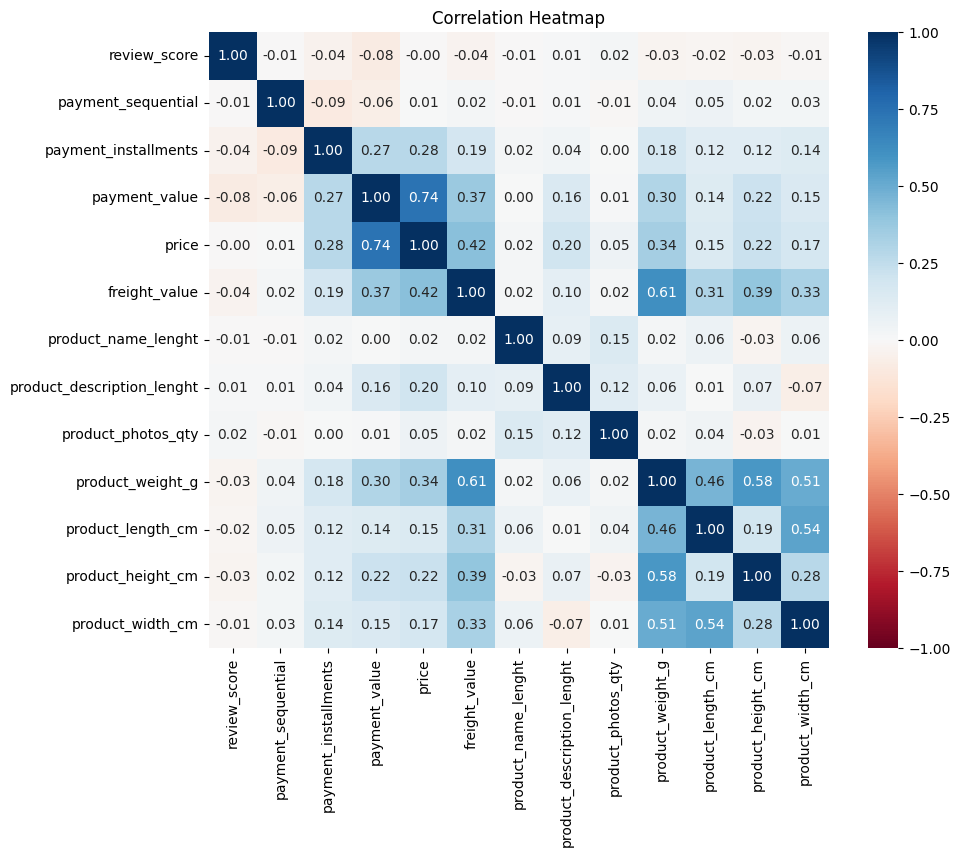

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', norm=plt.Normalize(-1,1), annot=True, fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

# **Feature** **Engineering**

> เพิ่มข้อความทั้งย่อหน้าที่ยกมา



In [ ]:
# รวม DataFrame ทั้งสองบน 'customer_id'
olist_times = pd.merge(olist_orders, olist_customer, on='customer_id', how='left')

# แปลงคอลัมน์ timestamp ให้เป็น datetime
timestamp_columns = [
    'order_purchase_timestamp',
    'order_approved_at',
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date'
]

for col in timestamp_columns:
    olist_times[col] = pd.to_datetime(olist_times[col], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# สร้างคอลัมน์เพิ่มเติมจาก 'order_purchase_timestamp'
olist_times['order_purchase_year'] = olist_times['order_purchase_timestamp'].dt.year
olist_times['order_purchase_month'] = olist_times['order_purchase_timestamp'].dt.month
olist_times['order_purchase_month_name'] = olist_times['order_purchase_timestamp'].dt.month_name()
olist_times['order_purchase_year_month'] = olist_times['order_purchase_timestamp'].dt.to_period('M').astype(str) ####
olist_times['order_purchase_date'] = olist_times['order_purchase_timestamp'].dt.date
olist_times['order_purchase_day'] = olist_times['order_purchase_timestamp'].dt.day
olist_times['order_purchase_dayofweek'] = olist_times['order_purchase_timestamp'].dt.dayofweek
olist_times['order_purchase_dayofweek_name'] = olist_times['order_purchase_timestamp'].dt.day_name()
olist_times['order_purchase_hour'] = olist_times['order_purchase_timestamp'].dt.hour

# หา 'order_purchase_weekofmonth'
def week_of_month(dt):
    first_day = dt.replace(day=1)
    dom = dt.day
    adjusted_dom = dom + first_day.weekday()  # Adjust day of the month based on the weekday of the first day
    return int(np.ceil(adjusted_dom / 7.0))

olist_times['order_purchase_weekofmonth'] = olist_times['order_purchase_timestamp'].apply(week_of_month)

# สร้างคอลัมน์ 'order_purchase_time_day' จาก 'order_purchase_hour'
def categorize_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

olist_times['order_purchase_time_day'] = olist_times['order_purchase_hour'].apply(categorize_time_of_day)
olist_times['delivery_time'] = olist_times['order_delivered_customer_date'] - olist_times['order_delivered_carrier_date']
olist_times['delivery_time_day'] = olist_times['delivery_time'].dt.days
olist_times['delivery_time_hour'] = olist_times['delivery_time'].dt.total_seconds() // 3600

olist_times

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp   order_approved_at  \
0        delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...            ...                      ...                 ...   
99436    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                customer_unique_id  \
0                        2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                        2018-08-13  af07308b275d755c9edb36a90c618231   
2                        2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                        2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                        2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   
...                             ...                               ...   
99436                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
99437                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
99438                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
99439                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
99440                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

       customer_zip_code_prefix  ... order_purchase_date order_purchase_day  \
0                          3149  ...          2017-10-02                  2   
1                         47813  ...          2018-07-24                 24   
2                         75265  ...          2018-08-08                  8   
3                         59296  ...          2017-11-18                 18   
4                          9195  ...          2018-02-13                 13   
...                         ...  ...                 ...                ...   
99436                     12209  ...          2017-03-

# **การวิเคราะห์อนุกรมเวลา (Time Series Analysis)**
-Number of orders by day of the week and hour of the day\
-Number of orders by day of the week and month of the week\
-แนวโน้มยอดขาย

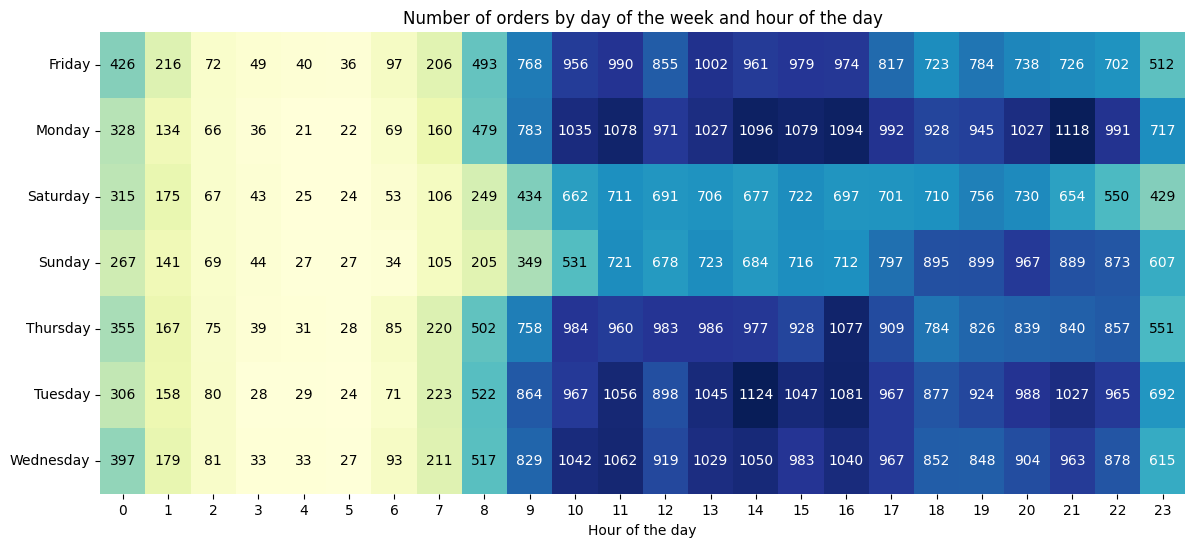

In [ ]:
hour_of_day = olist_times[['order_purchase_dayofweek_name','order_purchase_hour']].pivot_table(
    index='order_purchase_dayofweek_name',
    columns='order_purchase_hour',
    aggfunc='size',             # ข้อมูลที่จะทำการสรุปใน pivot คือ ขนาด (จำนวน)
    fill_value=0                # แทนค่าที่ไม่มีการเกิดด้วย 0
)

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(hour_of_day, cmap='YlGnBu', cbar=False)
mean_orders = hour_of_day.mean().mean()
for i in range(len(hour_of_day)):
    for j in range(len(hour_of_day.columns)):
        text_color = 'white' if hour_of_day.iloc[i, j] > mean_orders else 'black'
        ax.text(j+0.5, i+0.5, int(hour_of_day.iloc[i, j]),
            color=text_color, fontsize=10, ha="center", va="center")
plt.title("Number of orders by day of the week and hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("")
plt.show()

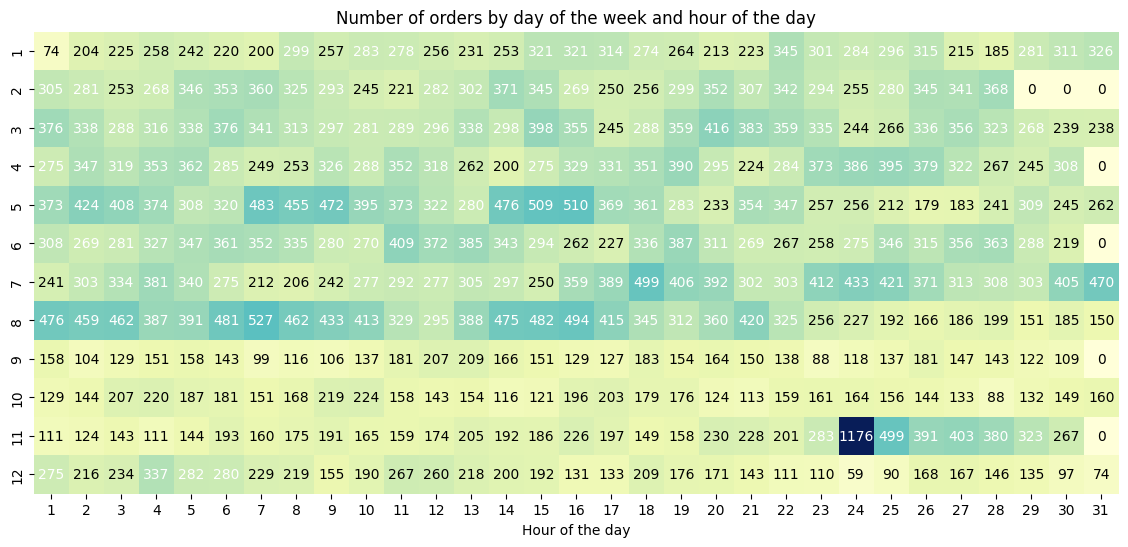

In [ ]:
day_of_month = olist_times[['order_purchase_month','order_purchase_day']].pivot_table(
    index='order_purchase_month',
    columns='order_purchase_day',
    aggfunc='size',             # ข้อมูลที่จะทำการสรุปใน pivot คือ ขนาด (จำนวน)
    fill_value=0                # แทนค่าที่ไม่มีการเกิดด้วย 0
)

fig, ax = plt.subplots(figsize=(14, 6))
sns.heatmap(day_of_month, cmap='YlGnBu', cbar=False)
mean_orders = day_of_month.mean().mean()
for i in range(len(day_of_month)):
    for j in range(len(day_of_month.columns)):
        text_color = 'white' if day_of_month.iloc[i, j] > mean_orders else 'black'
        ax.text(j+0.5, i+0.5, int(day_of_month.iloc[i, j]),
            color=text_color, fontsize=10, ha="center", va="center")
plt.title("Number of orders by day of the week and hour of the day")
plt.xlabel("Hour of the day")
plt.ylabel("")
plt.show()

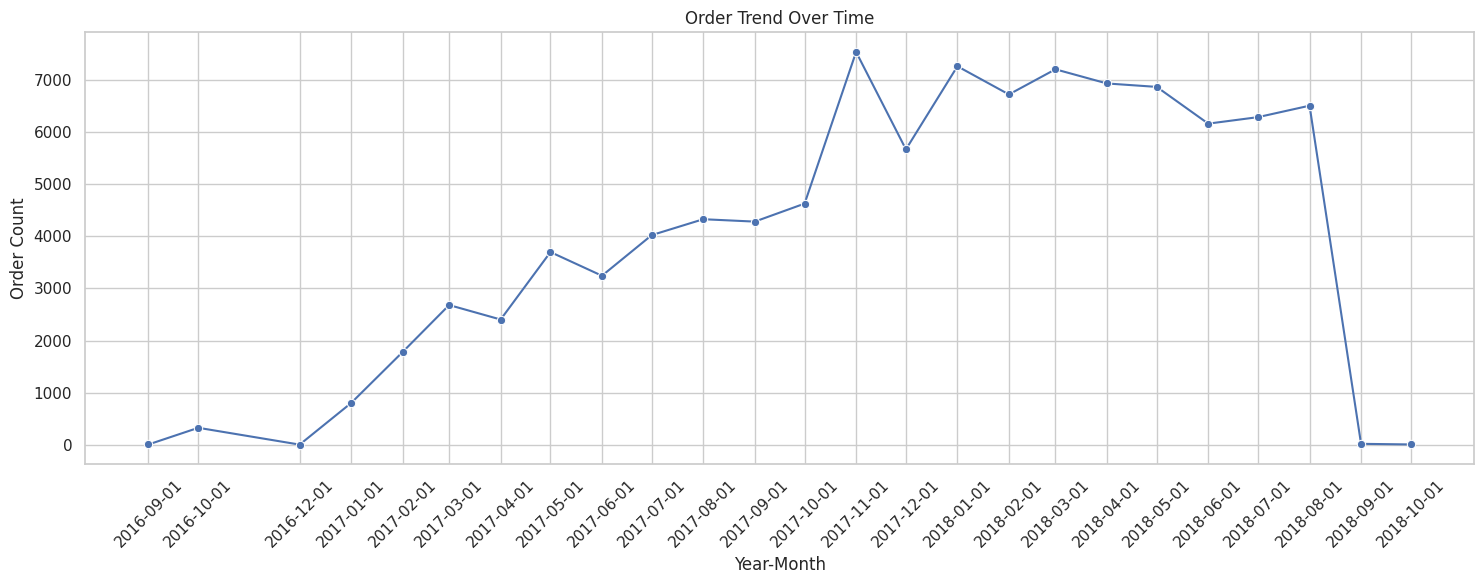

In [ ]:
count_order_month = olist_times.groupby('order_purchase_year_month')['order_id'].count().reset_index()
count_order_month['order_purchase_year_month'] = pd.to_datetime(count_order_month['order_purchase_year_month'])


sns.set(style="whitegrid")

plt.figure(figsize=(15, 6))
sns.lineplot(data=count_order_month, x='order_purchase_year_month', y='order_id', marker="o")

plt.title('Order Trend Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Order Count')
plt.xticks(ticks=count_order_month['order_purchase_year_month'], rotation=45)  # ตั้งค่าให้แสดงข้อมูลทั้งหมดในแกน x
plt.tight_layout()

plt.show()

# **การวิเคราะห์เชิงภูมิศาสตร์ (Geographical Analysis)**\
-Customer Distribution by State\
-Numbers of customers across states\
-Average purchase price of customer across states


In [ ]:
olist_customer_geo = (
    pd.merge(olist_orders, olist_customer, on='customer_id', how='left')
    .merge(olist_geolocation.drop_duplicates(subset='geolocation_zip_code_prefix'),
           left_on='customer_zip_code_prefix',
           right_on='geolocation_zip_code_prefix',
           how='left')
)

state_to_region = {
    'AC': 'Norte', 'AL': 'Nordeste', 'AP': 'Norte', 'AM': 'Norte', 'BA': 'Nordeste',
    'CE': 'Nordeste', 'DF': 'Centro-Oeste', 'ES': 'Sudeste', 'GO': 'Centro-Oeste',
    'MA': 'Nordeste', 'MT': 'Centro-Oeste', 'MS': 'Centro-Oeste', 'MG': 'Sudeste',
    'PA': 'Norte', 'PB': 'Nordeste', 'PR': 'Sul', 'PE': 'Nordeste', 'PI': 'Nordeste',
    'RJ': 'Sudeste', 'RN': 'Nordeste', 'RS': 'Sul', 'RO': 'Norte', 'RR': 'Norte',
    'SC': 'Sul', 'SP': 'Sudeste', 'SE': 'Nordeste', 'TO': 'Norte'
}

olist_customer_geo['region'] = olist_customer_geo['customer_state'].map(state_to_region)

olist_customer_geo

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                customer_unique_id  \
0               2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1               2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2               2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3               2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4               2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
...                             ...                               ...   
99436           2017-03-28 00:00:00  6359f309b166b0196dbf7ad2ac62bb5a   
99437           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
99438           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
99439           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
99440           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

       customer_zip_code_prefix            customer_city customer_state  \
0                          3149                sao paulo             SP   
1                         47813                barreiras             BA   
2                         75265               vianopolis             GO   
3                         59296  sao goncalo do amarante             RN   
4                          9195              santo andre             SP   
...                         ...                      ...            ...   
99436                     12209      sao jose dos campos             S

<ipython-input-9-8c0471b07c67>:13: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




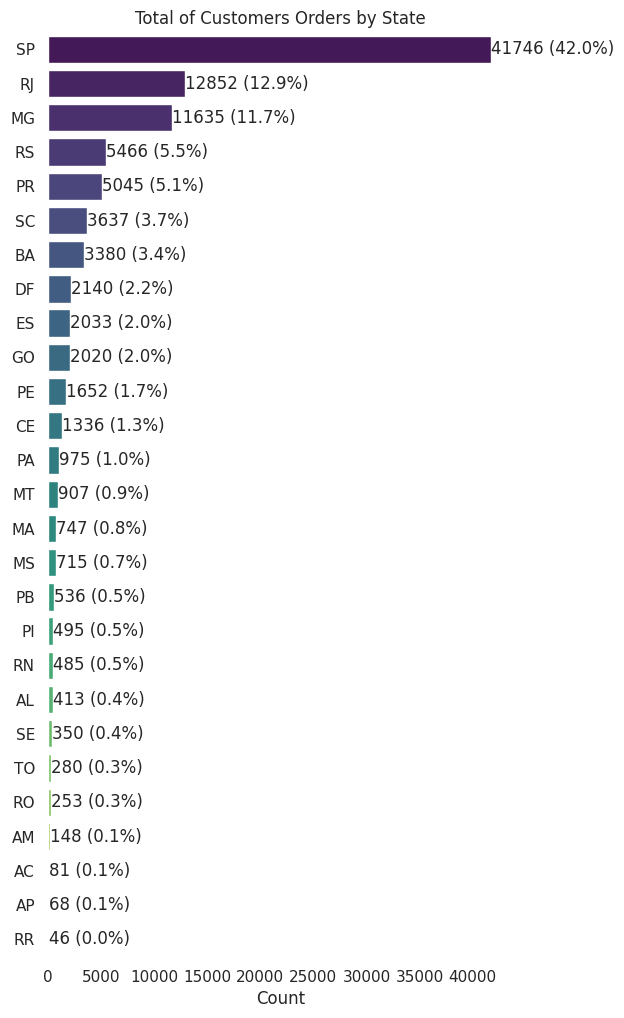

In [ ]:
# นับจำนวนการสั่งซื้อโดยกลุ่มตาม customer_state
state_order_counts = olist_customer_geo['customer_state'].value_counts().reset_index()
state_order_counts.columns = ['customer_state', 'count']

# คำนวณเปอร์เซ็นต์ของการสั่งซื้อแต่ละรัฐ
state_order_counts['percentage'] = (state_order_counts['count'] / state_order_counts['count'].sum()) * 100

# สร้างกราฟ
plt.figure(figsize=(6, 12))
sns.set(style="white")

# ใช้ barplot ในการสร้างกราฟแสดงจำนวนการสั่งซื้อและเปอร์เซ็นต์ของแต่ละรัฐ
sns.barplot(
    data=state_order_counts,
    y='customer_state',
    x='count',
    palette='viridis'
)

# แสดงค่าจำนวนการสั่งซื้อและเปอร์เซ็นต์บนกราฟ
for index, row in state_order_counts.iterrows():
    plt.text(row['count'], index, f"{row['count']} ({row['percentage']:.1f}%)", va='center')

sns.despine(left=True, bottom=True)

# ตั้งค่าชื่อและหัวข้อของกราฟ
plt.xlabel('Count')
plt.ylabel('')
plt.title('Total of Customers Orders by State')
plt.show()

In [ ]:
# สร้าง DataFrame ที่มีทั้ง customer_id และ order_purchase_year_month
olist_times_subset = olist_times[['customer_id', 'order_purchase_year_month']]

# รวมข้อมูลทั้งหมดและเก็บผลลัพธ์ลงในตัวแปร olist_customer_geo ใหม่
olist_customer_geo = olist_customer_geo.merge(olist_times_subset, on='customer_id', how='left')

# แสดง DataFrame ที่ได้หลังการ merge
olist_customer_geo


order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date                customer_unique_id  \
0               2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1               2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2               2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3               2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4               2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
...                             ...                               ...   
99436           2017-03-28 00:00:00  6359f309b166b0196dbf7ad2ac62bb5a   
99437           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
99438           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
99439           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
99440           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

       customer_zip_code_prefix            customer_city customer_state  \
0                          3149                sao paulo             SP   
1                         47813                barreiras             BA   
2                         75265               vianopolis             GO   
3                         59296  sao goncalo do amarante             RN   
4                          9195              santo andre             SP   
...                         ...                      ...            ...   
99436                     12209      sao jose dos campos             S

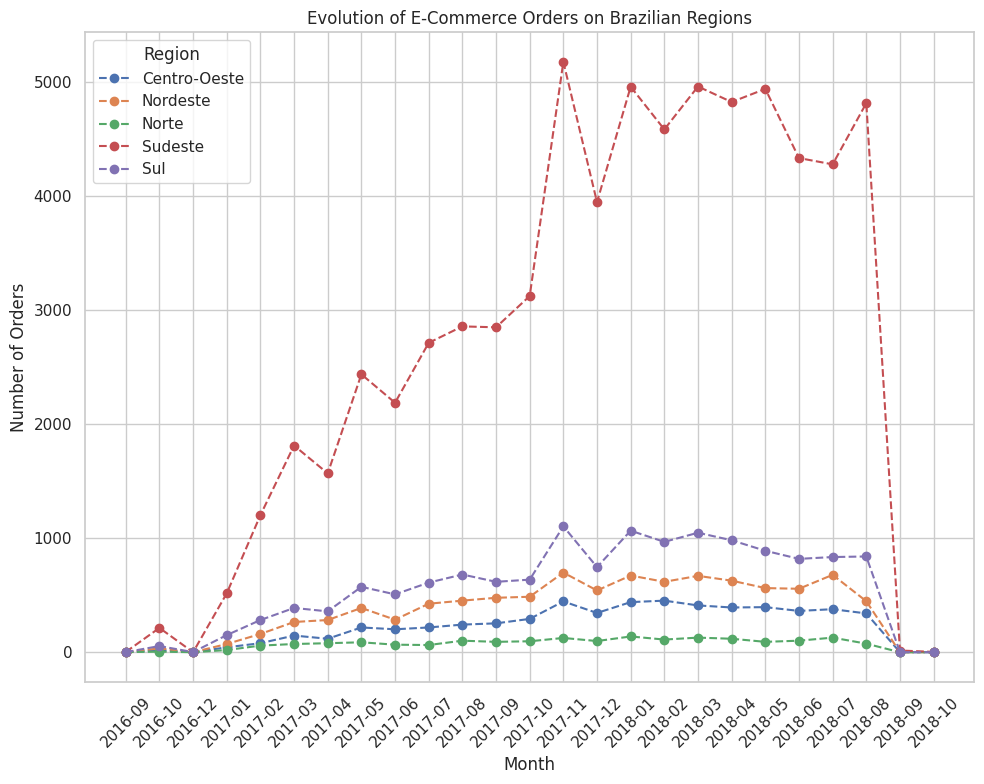

In [ ]:
region_order_counts = olist_customer_geo.groupby(['order_purchase_year_month', 'region'])['order_id'].count().reset_index()

region_order_pivot = region_order_counts.pivot(index='order_purchase_year_month', columns='region', values='order_id').fillna(0)

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for region in region_order_pivot.columns:
    plt.plot(region_order_pivot.index, region_order_pivot[region], marker='o', linestyle='--', label=region)

plt.title('Evolution of E-Commerce Orders on Brazilian Regions')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()

<ipython-input-23-aed5e60e7421>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-23-aed5e60e7421>:16: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




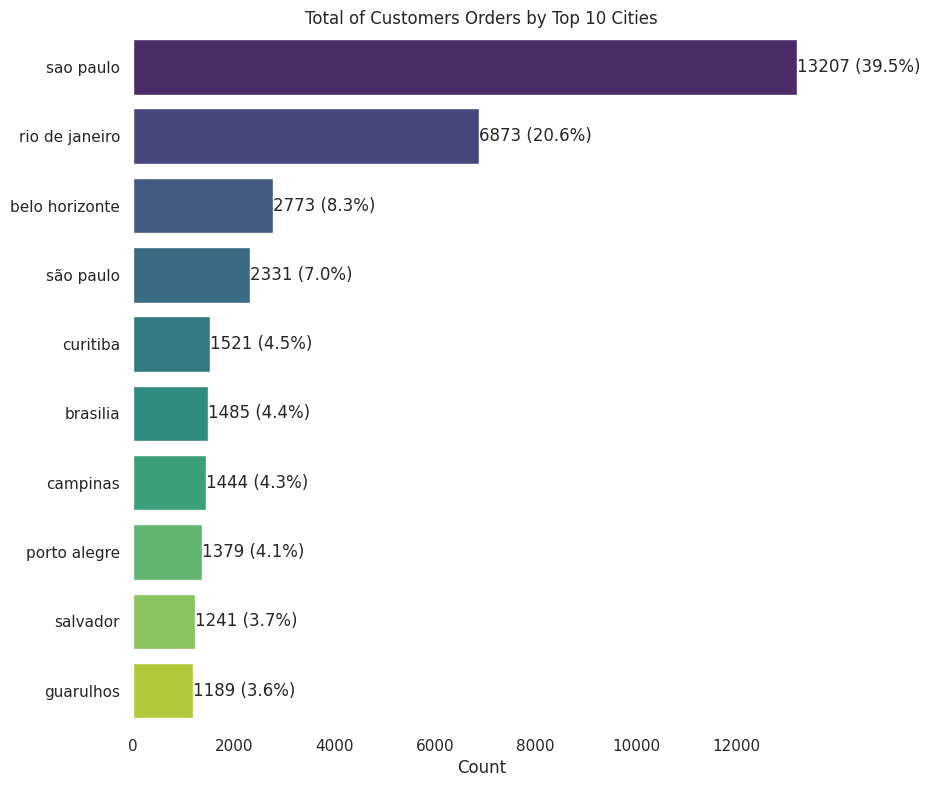

In [ ]:
state_order_counts = olist_customer_geo['geolocation_city'].value_counts().reset_index()
state_order_counts.columns = ['geolocation_city', 'count']


top_10_cities = state_order_counts.head(10)

top_10_cities['percentage'] = (top_10_cities['count'] / top_10_cities['count'].sum()) * 100


plt.figure(figsize=(9, 9))
sns.set(style="white")

sns.barplot(
    data=top_10_cities,
    y='geolocation_city',
    x='count',
    palette='viridis'
)

for index, row in top_10_cities.iterrows():
    plt.text(row['count'], index, f"{row['count']} ({row['percentage']:.1f}%)", va='center')

sns.despine(left=True, bottom=True)

plt.xlabel('Count')
plt.ylabel('')
plt.title('Total of Customers Orders by Top 10 Cities')
plt.show()


<ipython-input-26-a4beb74ef89d>:23: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-26-a4beb74ef89d>:25: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




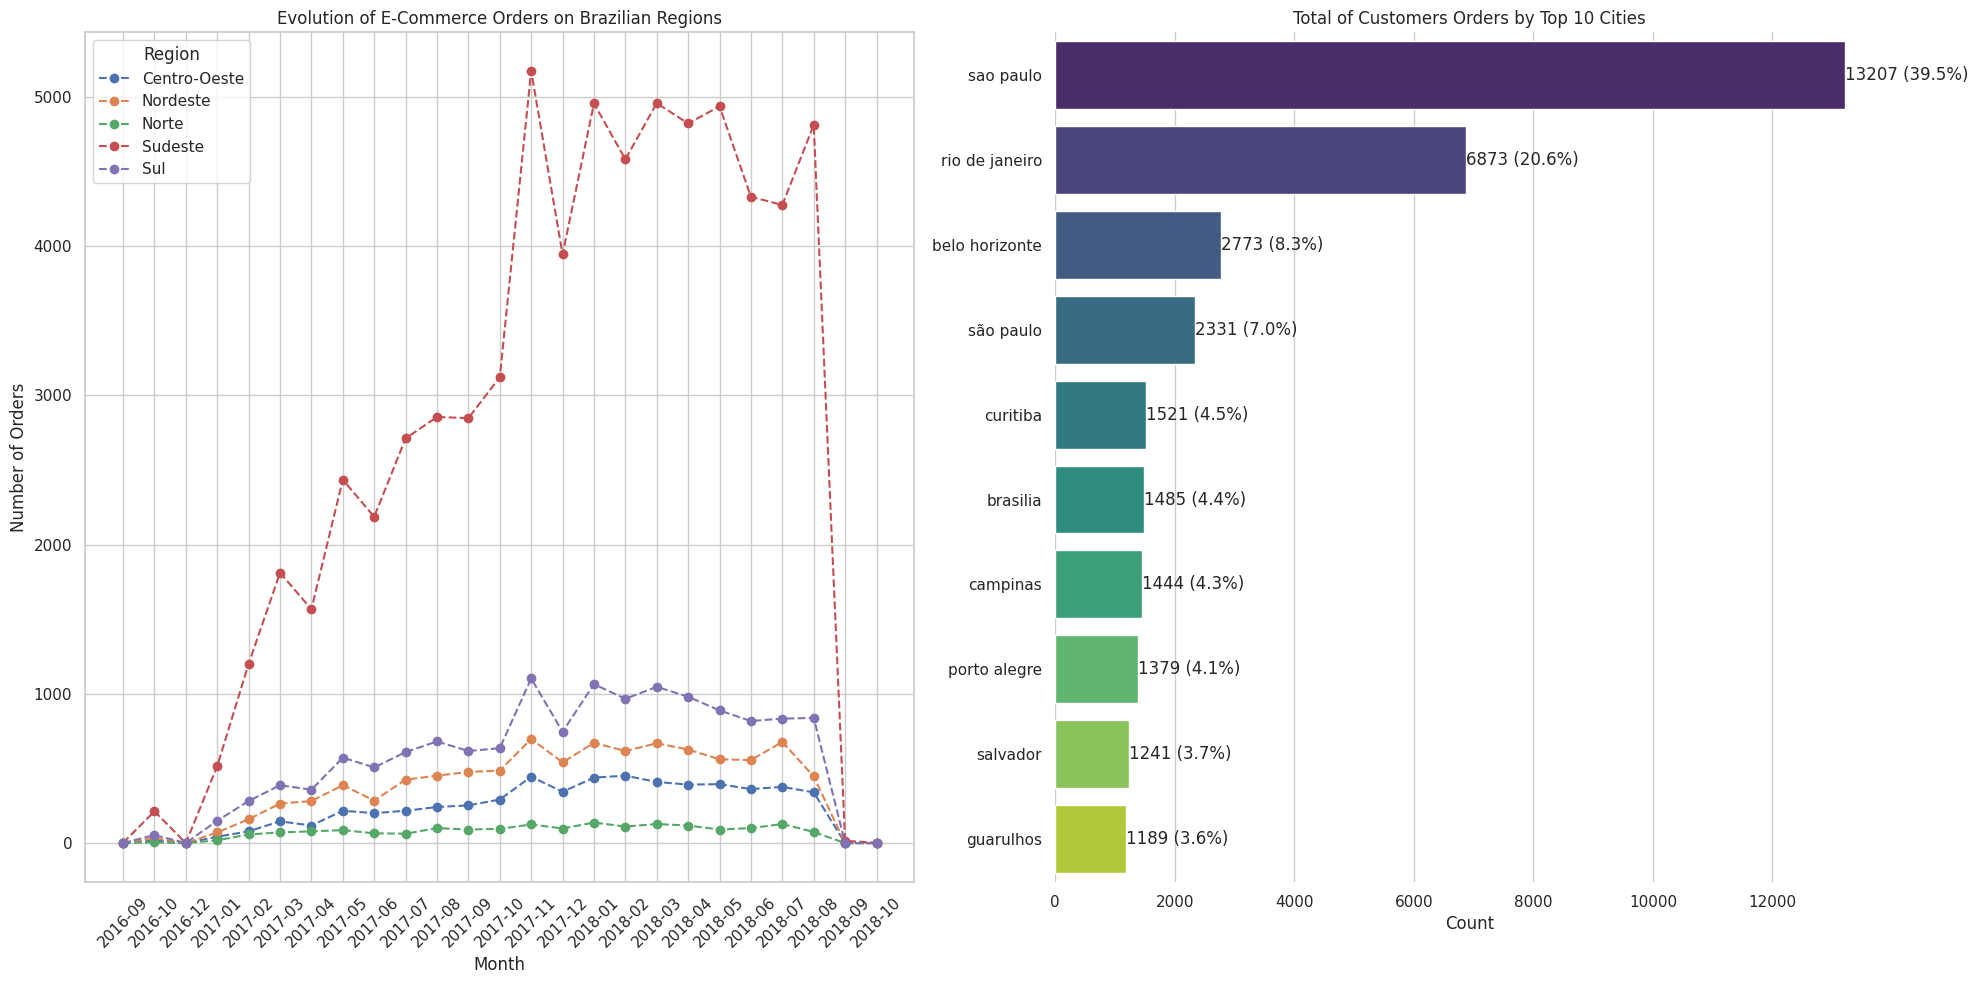

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.set(style="whitegrid")

# กราฟที่ 1: Evolution of E-Commerce Orders on Brazilian Regions
region_order_counts = olist_customer_geo.groupby(['order_purchase_year_month', 'region'])['order_id'].count().reset_index()
region_order_pivot = region_order_counts.pivot(index='order_purchase_year_month', columns='region', values='order_id').fillna(0)

for region in region_order_pivot.columns:
    axes[0].plot(region_order_pivot.index, region_order_pivot[region], marker='o', linestyle='--', label=region)

axes[0].set_title('Evolution of E-Commerce Orders on Brazilian Regions')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Orders')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Region')

# กราฟที่ 2: Total of Customers Orders by Top 10 Cities
state_order_counts = olist_customer_geo['geolocation_city'].value_counts().reset_index()
state_order_counts.columns = ['geolocation_city', 'count']

top_10_cities = state_order_counts.head(10)
top_10_cities['percentage'] = (top_10_cities['count'] / top_10_cities['count'].sum()) * 100

sns.barplot(
    data=top_10_cities,
    y='geolocation_city',
    x='count',
    palette='viridis',
    ax=axes[1]
)

for index, row in top_10_cities.iterrows():
    axes[1].text(row['count'], index, f"{row['count']} ({row['percentage']:.1f}%)", va='center')

sns.despine(left=True, bottom=True, ax=axes[1])

axes[1].set_xlabel('Count')
axes[1].set_ylabel('')
axes[1].set_title('Total of Customers Orders by Top 10 Cities')

plt.tight_layout()
plt.show()

# **การแบ่งกลุ่มลูกค้า (Customer Segmentation)**
แบ่งกลุ่มด้วย RFM metrics\
แบ่งกลุ่ม

In [ ]:
rfm_cus = (olist_orders.merge(olist_customer, on='customer_id')
                                  .merge(olist_order_items, on='order_id')
                                  )

rfm_cus['order_purchase_timestamp'] = pd.to_datetime(rfm_cus['order_purchase_timestamp'])

#RFM Metrics
current_date = datetime(2018, 12, 31)

rfm = rfm_cus.groupby('customer_unique_id').agg({
    'order_purchase_timestamp': lambda x: (current_date - x.max()).days,
    'order_id': 'count',
    'price': 'sum'
}).reset_index()

rfm.columns = ['customer_unique_id', 'Recency', 'Frequency', 'Monetary']

print(rfm.head())

                 customer_unique_id  Recency  Frequency  Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      234          1    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      237          1     18.90
2  0000f46a3911fa3c0805444483337064      660          1     69.00
3  0000f6ccb0745a6a4b88665a16c9f078      444          1     25.99
4  0004aac84e0df4da2b147fca70cf8255      411          1    180.00


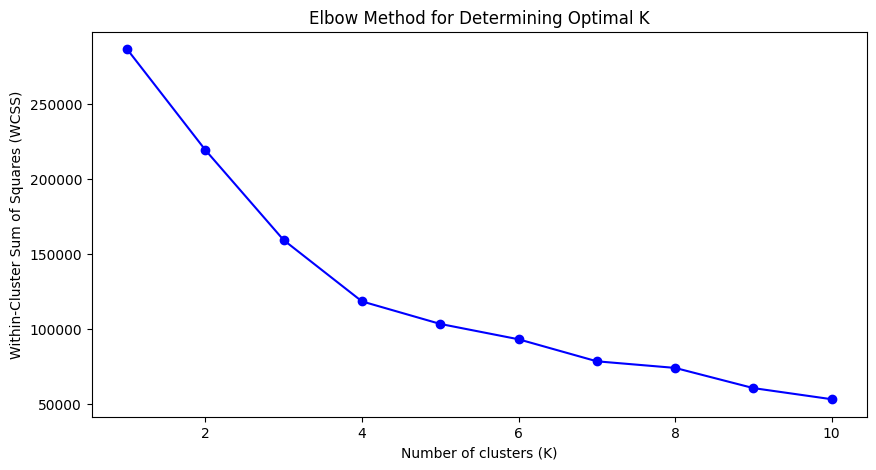

In [ ]:
# เลือกคุณสมบัติสำหรับการแบ่งกลุ่ม
features = rfm[['Recency', 'Frequency', 'Monetary']]

# การปรับมาตราส่วนข้อมูล
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# ใช้ Elbow Method เพื่อหาจำนวนกลุ่มที่เหมาะสม
wcss = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# วาดกราฟ Elbow Method
plt.figure(figsize=(10,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Determining Optimal K')
plt.show()

Cluster 0
            Recency     Frequency      Monetary  Cluster
count  34314.000000  34314.000000  34314.000000  34314.0
mean     378.308416      1.098356    113.888625      0.0
std       51.586974      0.297800    102.889378      0.0
min      294.000000      1.000000      2.290000      0.0
25%      334.000000      1.000000     45.900000      0.0
50%      381.000000      1.000000     84.900000      0.0
75%      415.000000      1.000000    147.900000      0.0
max      481.000000      2.000000    645.990000      0.0


Cluster 1
            Recency     Frequency      Monetary  Cluster
count  34837.000000  34837.000000  34837.000000  34837.0
mean     210.222838      1.097282    114.842669      1.0
std       49.910904      0.296345    103.599508      0.0
min      118.000000      1.000000      0.850000      1.0
25%      163.000000      1.000000     45.500000      1.0
50%      211.000000      1.000000     85.000000      1.0
75%      253.000000      1.000000    148.000000      1.0
max      

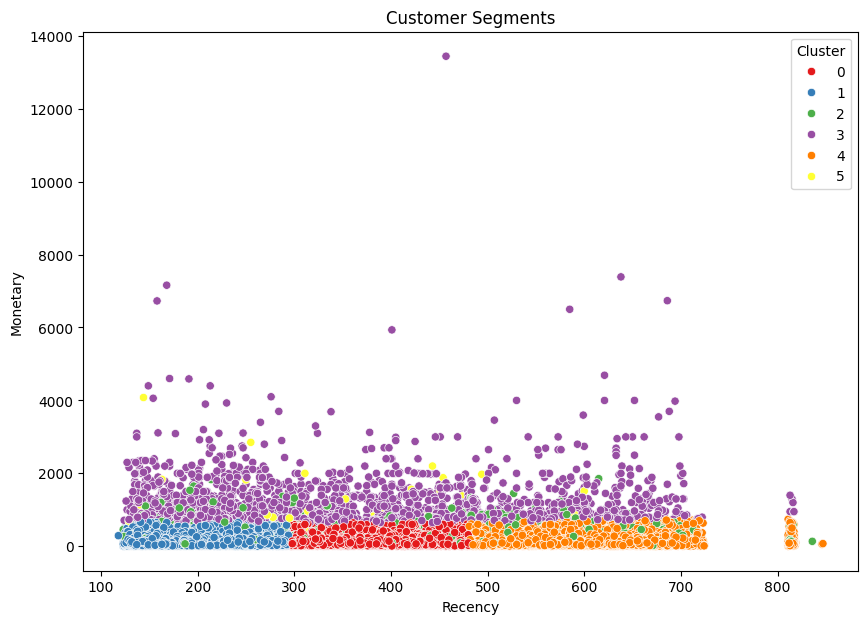

In [ ]:
k = 6
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
rfm['Cluster'] = kmeans.fit_predict(scaled_features)

# วิเคราะห์กลุ่มลูกค้า
for i in range(k):
    print(f"Cluster {i}")
    print(rfm[rfm['Cluster'] == i].describe())
    print("\n")

# สร้างกราฟ Scatter Plot ของกลุ่มต่าง ๆ
plt.figure(figsize=(10,7))
sns.scatterplot(x='Recency', y='Monetary', hue='Cluster', data=rfm, palette='Set1')
plt.title('Customer Segments')
plt.show()

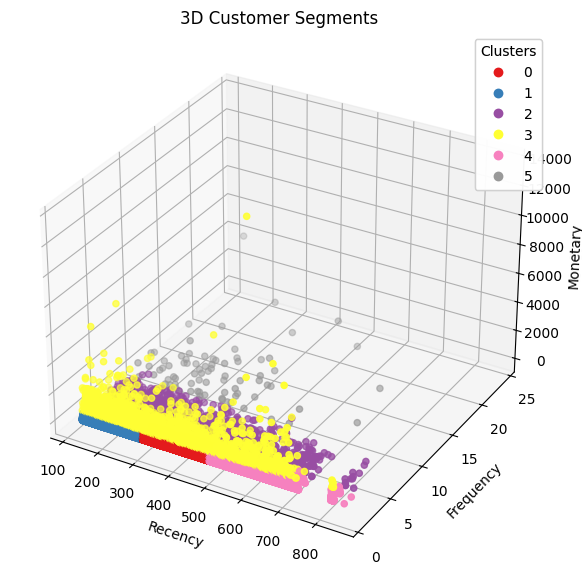

In [ ]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'], cmap='Set1')

ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('3D Customer Segments')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()

In [ ]:
pro_cus = (olist_orders.merge(olist_customer, on='customer_id')
                                  .merge(olist_order_items, on='order_id')
                                  .merge(olist_products, on='product_id')
           )

pro_cus['product_category_name'].fillna('Other', inplace=True)
pro_cus



order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp    order_approved_at  \
0         delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...             ...                      ...                  ...   
112645    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
112646    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
112647    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112648    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
112649    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112645          2018-02-07 23:22:42           2018-02-28 17:37:56   
112646          2017-08-28 20:52:26           2017-09-21 11:24:17   
112647          2018-01-12 15:35:03           2018-01-25 23:32:54   
112648          2018-01-12 15:35:03           2018-01-25 23:32:54   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                2017-10-18 00:00:00  7c396fd4830fd04220f754e42b4e5bff   
1                2018-08-13 00:00:00  af07308b275d755c9edb36a90c618231   
2                2018-09-04 00:00:00  3a653a41f6f9fc3d2a113cf8398680e8   
3                2017-12-15 00:00:00  7c142cf63193a1473d2e66489a9ae977   
4                2018-02-26 00:00:00  72632f0f9dd73dfee390c9b22eb56dd6   
...                              ...                               ...   
112645           2018-03-02 00:00:00  da62f9e57a76d978d02ab5362c509660   
112646           2017-09-27 00:00:00  737520a9aad80b3fbbdad19b66b37b30   
112647           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
112648           2018-02-15 00:00:00  5097a5312c8b157bb7be58ae360ef43c   
112649           2018-04-03 00:00:00  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix  ...   price freight_value  \
0                           3149  ...   29.99          8.72   
1                          47813  ...  118.70         22.76   
2                          75265  ...  159.90         19.22   
3                          59296  ...   45.00         27.20   
4                           9195  ...   19.90          8.72   
...                          ...  ...     ...           ...   
112645                     11722  ...  174.90         20.10   
112646                     45920  ...  205.9

In [ ]:
total_sales = pro_cus.groupby('product_id')['price'].sum().reset_index()
total_sales.columns = ['product_id', 'Total_Sales']

unique_customers = pro_cus.groupby('product_id')['customer_unique_id'].nunique().reset_index()
unique_customers.columns = ['product_id', 'Unique_Customers']

purchase_frequency = pro_cus.groupby('product_id')['order_id'].count().reset_index()
purchase_frequency.columns = ['product_id', 'Purchase_Frequency']

current_date = datetime(2018, 12, 31)
pro_cus['order_purchase_timestamp'] = pd.to_datetime(pro_cus['order_purchase_timestamp'])
recency = pro_cus.groupby('product_id')['order_purchase_timestamp'].max().reset_index()
recency['Recency'] = (current_date - recency['order_purchase_timestamp']).dt.days
recency = recency[['product_id', 'Recency']]

avg_order_value = pro_cus.groupby('product_id')['order_item_id'].mean().reset_index()
avg_order_value.columns = ['product_id', 'Avg_Order_Value']

feature_df = total_sales.merge(unique_customers, on='product_id')
feature_df = feature_df.merge(purchase_frequency, on='product_id')
feature_df = feature_df.merge(recency, on='product_id')
feature_df = feature_df.merge(avg_order_value, on='product_id')
feature_df = feature_df.merge(pro_cus[['product_id', 'product_category_name']].drop_duplicates(), on='product_id')
print(feature_df.head())



                         product_id  Total_Sales  Unique_Customers  \
0  00066f42aeeb9f3007548bb9d3f33c38       101.65                 1   
1  00088930e925c41fd95ebfe695fd2655       129.90                 1   
2  0009406fd7479715e4bef61dd91f2462       229.00                 1   
3  000b8f95fcb9e0096488278317764d19       117.80                 2   
4  000d9be29b5207b54e86aa1b1ac54872       199.00                 1   

   Purchase_Frequency  Recency  Avg_Order_Value  product_category_name  
0                   1      224              1.0             perfumaria  
1                   1      383              1.0             automotivo  
2                   1      374              1.0        cama_mesa_banho  
3                   2      142              1.0  utilidades_domesticas  
4                   1      271              1.0     relogios_presentes  


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

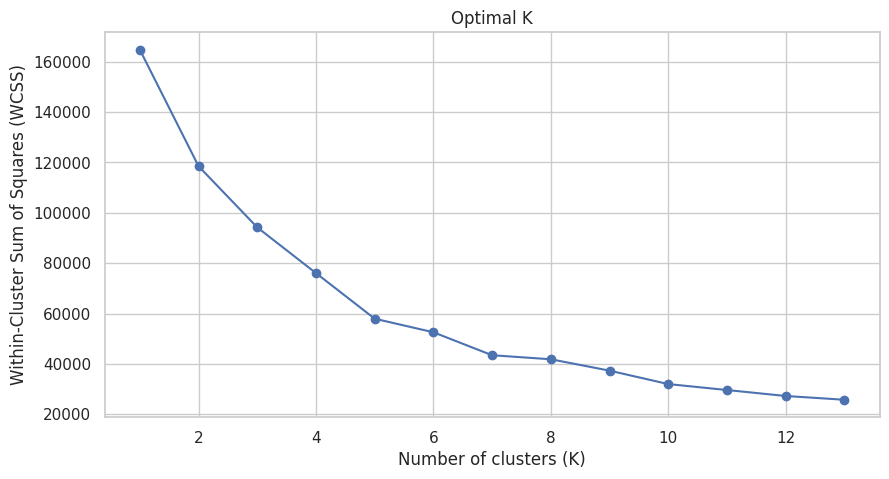

In [ ]:
#(ยกเว้น product_id)
features = feature_df.drop(['product_id', 'product_category_name'], axis=1)

# การปรับมาตราส่วนข้อมูล
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


# หาค่า WCSS สำหรับจำนวนกลุ่มที่แตกต่างกัน
wcss = []
K = range(1, 14)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# วาดกราฟ Elbow Method
plt.figure(figsize=(10,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Optimal K')
plt.show()

In [ ]:
k = 5
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
feature_df['Cluster'] = kmeans.fit_predict(scaled_features)

for i in range(k):
    print(f"Cluster {i}")
    print(feature_df[feature_df['Cluster'] == i].describe())
    print("\n")

Cluster 0
        Total_Sales  Unique_Customers  Purchase_Frequency     Recency  \
count    420.000000        420.000000          420.000000  420.000000   
mean    6193.390571         44.819048           49.176190  203.166667   
std     5455.696847         27.138654           29.760498   97.295558   
min      538.120000          2.000000            5.000000  123.000000   
25%     2584.195000         28.000000           31.000000  135.000000   
50%     4845.765000         38.000000           41.000000  158.000000   
75%     8124.585000         53.250000           59.000000  241.000000   
max    48899.340000        143.000000          169.000000  643.000000   

       Avg_Order_Value  Cluster  
count       420.000000    420.0  
mean          1.133086      0.0  
std           0.203964      0.0  
min           1.000000      0.0  
25%           1.018696      0.0  
50%           1.062500      0.0  
75%           1.148847      0.0  
max           2.330097      0.0  


Cluster 1
        Total_

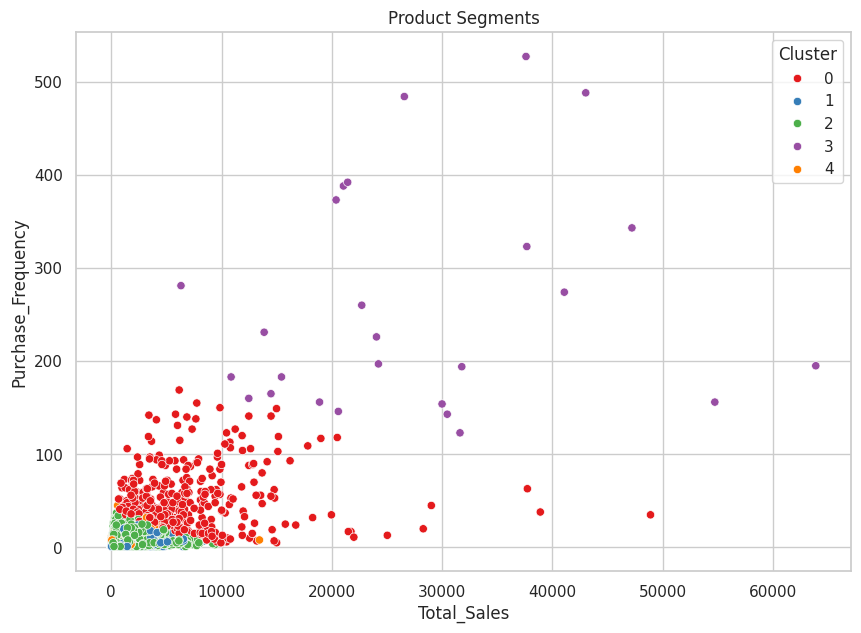

In [ ]:
plt.figure(figsize=(10,7))
sns.scatterplot(x='Total_Sales', y='Purchase_Frequency', hue='Cluster', data=feature_df, palette='Set1')
plt.title('Product Segments')
plt.show()

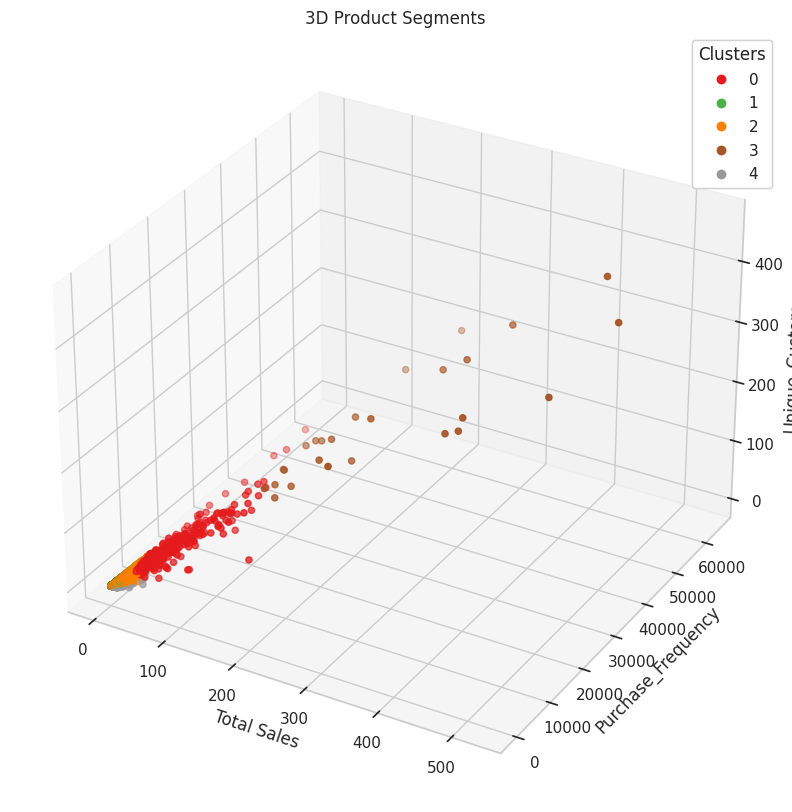

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(feature_df['Purchase_Frequency'], feature_df['Total_Sales'], feature_df['Unique_Customers'],
                     c=feature_df['Cluster'], cmap='Set1')

ax.set_xlabel('Total Sales')
ax.set_ylabel('Purchase_Frequency')
ax.set_zlabel('Unique_Customers')
ax.set_title('3D Product Segments')

legend = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend)

plt.show()



In [ ]:
feature_df['Cluster'] = feature_df['Cluster'].astype(str)

fig = px.scatter_3d(
    feature_df,
    x='Total_Sales',
    y='Purchase_Frequency',
    z='Unique_Customers',
    color = 'Cluster')

fig.update_traces(marker=dict(size=5))

fig.update_layout(
    title='3D Product Segments',
    scene=dict(
        xaxis_title='Total Sales',
        yaxis_title='Purchase Frequency',
        zaxis_title='Unique Customers'
    )
)

fig.show()


Cluster 0 (สินค้าหลัก):\
ส่งโปรโมชั่นเฉพาะกลุ่มเพื่อเพิ่มความถี่ในการซื้อ,
เสนอสิทธิพิเศษสำหรับลูกค้าที่ซื้อซ้ำ\
Cluster 1 (สินค้าขายช้า):\
ส่งโปรโมชั่นพิเศษหรือส่วนลดเพื่อกระตุ้นการซื้อ,
วิเคราะห์เหตุผลที่สินค้ากลุ่มนี้ขายไม่ดีและปรับปรุงตามความจำเป็น\
Cluster 2 (สินค้าปานกลาง):\
ส่งโปรโมชั่นเพื่อเพิ่มยอดขายและความถี่ในการซื้อ,
ส่งข้อมูลเกี่ยวกับสินค้าที่เกี่ยวข้องหรือสินค้าที่ลูกค้าอาจสนใจ\
Cluster 3 (สินค้าพิเศษ):\
ส่งโปรโมชั่นพิเศษหรือข้อเสนอพิเศษสำหรับสินค้ากลุ่มนี้\
Cluster 4 (สินค้าพรีเมียม):\
สร้างแคมเปญการตลาดที่เน้นคุณค่าของสินค้าพรีเมียม

# **วิเคราะห์ประสิทธิภาพของการขาย (Sales Performance Analysis)**\
-ยอดขายตามสินค้า\
-ยอดขายตามกลุ่มลูกค้า


In [ ]:
olist_times_items = (olist_times.merge(olist_order_items, on='order_id')
                                            .merge(olist_products, on='product_id')
                                            .merge(feature_df[['product_id', 'Cluster']], on='product_id')
                                  )

category_sum = olist_times_items.groupby('product_category_name')['price'].sum().reset_index()

category_sum['rank'] = category_sum['price'].rank(method='min', ascending=False)

top_categories = category_sum[category_sum['rank'] <= 15]
other_categories = category_sum[category_sum['rank'] > 15]

other_row = pd.DataFrame({
    'product_category_name': ['Other categories'],
    'price': [other_categories['price'].sum()]
})

category_sales_summary = pd.concat([top_categories[['product_category_name', 'price']], other_row], ignore_index=True)

category_sales_summary.rename(columns={'product_category_name': 'category', 'price': 'sales'}, inplace=True)

category_sales_summary.sort_values(by='sales', ascending=False).reset_index(drop=True)


category       sales
0         Other categories  3043686.27
1             beleza_saude  1258681.34
2       relogios_presentes  1205005.68
3          cama_mesa_banho  1036988.68
4            esporte_lazer   988048.97
5   informatica_acessorios   911954.32
6         moveis_decoracao   729762.49
7               cool_stuff   635290.85
8    utilidades_domesticas   632248.66
9               automotivo   592720.11
10      ferramentas_jardim   485256.46
11              brinquedos   483946.60
12                   bebes   411764.89
13              perfumaria   399124.87
14               telefonia   323667.53
15       moveis_escritorio   273960.70

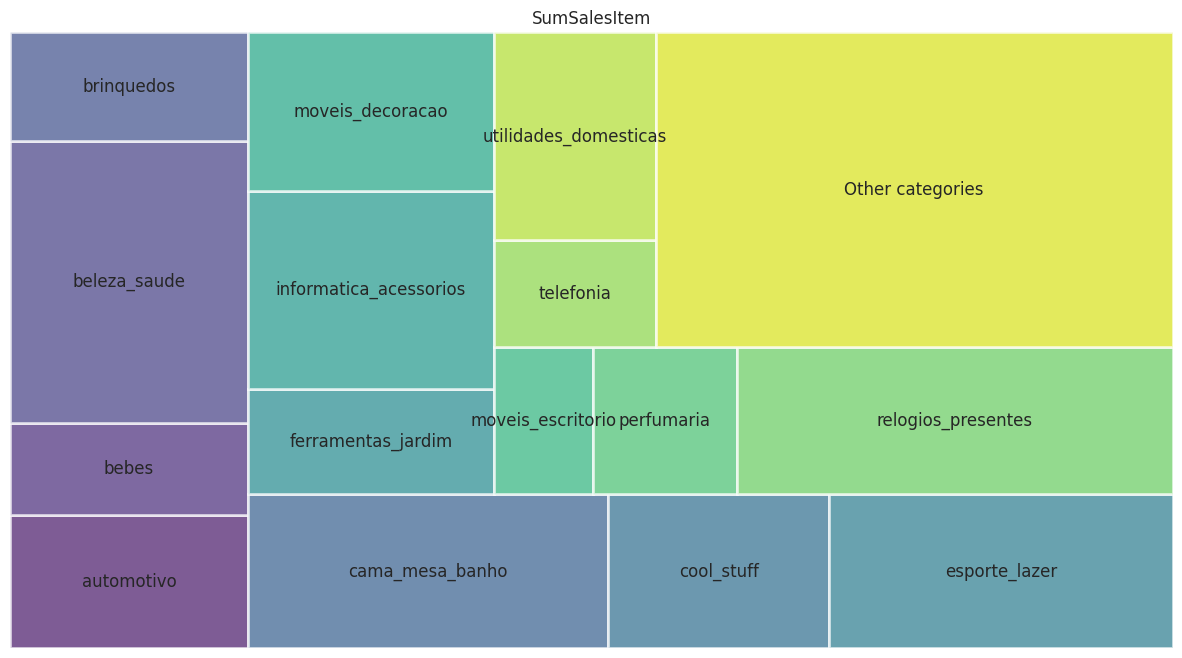

In [ ]:
!pip install squarify
import squarify

plt.figure(figsize=(15, 8))
plt.title('SumSalesItem')
color = sns.color_palette("viridis", len(category_sales_summary))
squarify.plot(
    sizes=category_sales_summary['sales'],
    label=category_sales_summary['category'],
    alpha=0.7,
    color=color,
    edgecolor="white",
    linewidth=2
)
plt.axis('off')
plt.show()

In [ ]:
category_sales_summary_5 = category_sales_summary.nlargest(5, 'sales')
top_category_sales_summary = olist_times_items[olist_times_items['product_category_name'].isin(category_sales_summary_5['category'])]
top_category_sales_summary

order_id                       customer_id  \
14      5ff96c15d0b717ac6ad1f3d77225a350  19402a48fe860416adf93348aba37740   
19      85ce859fd6dc634de8d2f1e290444043  059f7fc5719c7da6cbafe370971a8d70   
21      203096f03d82e0dffbc41ebc2e2bcfb7  d2b091571da224a1b36412c18bc3bbfe   
22      f848643eec1d69395095eb3840d2051e  4fa1cd166fa598be6de80fa84eaade43   
30      91b2a010e1e45e6ba3d133fa997597be  cce89a605105b148387c52e286ac8335   
...                                  ...                               ...   
112635  c22a47117b6a87c967b0c278488110c1  6e153567dc52ea59c0498ef5383e9c7a   
112637  c81f74e50f0496fa39716cc77cacd460  7b270ebc87c25c8404348c10ff80a80e   
112642  aa04ef5214580b06b10e2a378300db44  f01a6bfcc730456317e4081fe0c9940e   
112644  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
14        delivered      2018-07-25 17:44:10 2018-07-25 17:55:14   
19        delivered      2017-11-21 00:03:41 2017-11-21 00:14:22   
21        delivered      2017-09-18 14:31:30 2017-09-19 04:04:09   
22        delivered      2018-03-15 08:52:40 2018-03-15 09:09:31   
30        delivered      2018-05-02 11:45:38 2018-05-03 12:55:01   
...             ...                      ...                 ...   
112635    delivered      2018-06-22 20:53:29 2018-06-22 21:17:45   
112637    delivered      2018-03-04 22:48:38 2018-03-04 23:09:22   
112642    delivered      2017-01-27 00:30:03 2017-01-27 01:05:25   
112644    delivered      2017-03-09 09:54:05 2017-03-09 09:54:05   
112649    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
14              2018-07-26 13:16:00           2018-07-30 15:52:25   
19              2017-11-23 21:32:26           2017-11-27 18:28:00   
21              2017-10-06 17:50:03           2017-10-09 22:23:46   
22              2018-03-15 19:52:48           2018-03-19 18:08:32   
30              2018-05-10 16:16:00           2018-05-16 20:56:24   
...                             ...                           ...   
112635          2018-06-25 17:50:00           2018-07-03 19:48:54   
112637          2018-03-05 16:15:04           2018-03-13 18:54:32   
112642          2017-01-30 11:40:16           2017-02-07 13:15:25   
112644          2017-03-10 11:18:03           2017-03-17 15:08:01   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
14                        2018-08-08  e2dfa3127fedbbca9707b36304996dab   
19                        2017-12-11  d0ff1a7468fcc46b8fc658ab35d2a12c   
21                        2017-09-28  d699688533772c15a061e8ce81cb56df   
22                        2018-03-29  68954feaafe4dd638f3bd3e2afa174ec   
30                        2018-05-23  bd13608b9c6033892ce62269b50a0afc   
...                              ...                               ...   
112635                    2018-07-23  e930b415f39ab827ea66de80a9d36a22   
112637                    2018-03-26  324a22205906aa2612a33e63c00ca8bb   
112642                    2017-03-17  e03dbdf5e56c96b106d8115ac336f47f   
112644                    2017-03-28  6359f309b166b0196dbf7ad2ac62bb5a   
112649                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix  ... freight_value product_category_name  \
14                          4812  ...         12.80       cama_mesa_banho   
19                         13186  ...         11.85       cama_mesa_banho   
21                          4001  ...          8.96          beleza_saude   
22                          8473  ...          8.91          beleza_saude   
30                          9182  ...         13.69    relogios_presentes   
...                          ...  ...           ...                   ...   
112635               

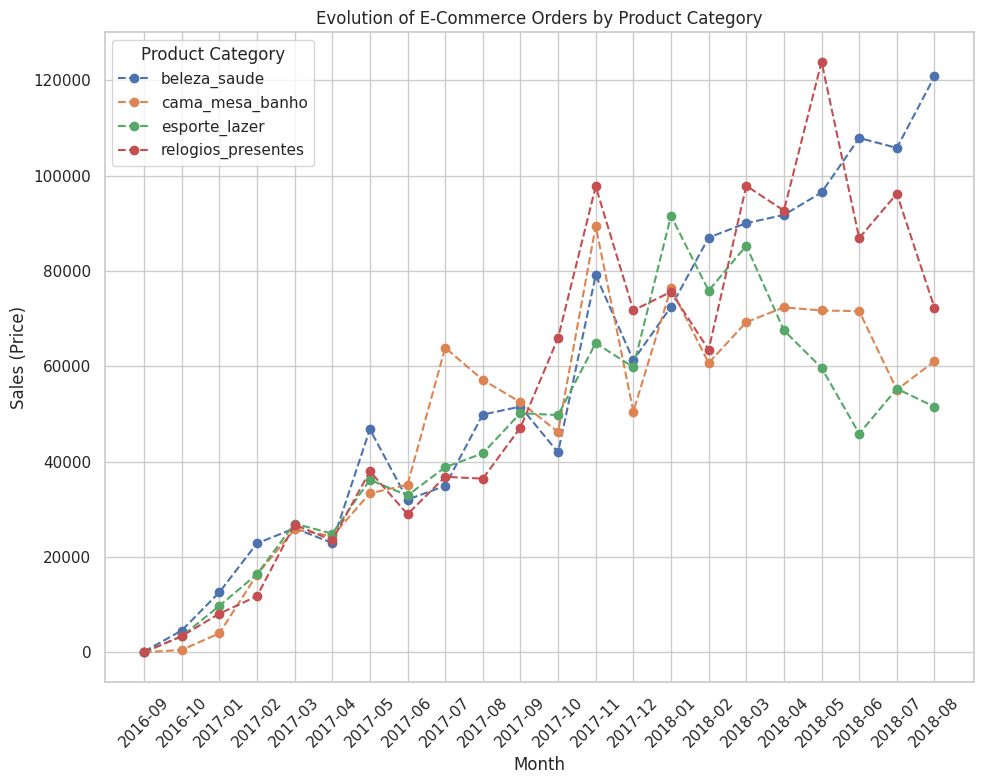

In [ ]:
category_sales_summary_5 = category_sales_summary.nlargest(5, 'sales')
top_category_sales_summary = olist_times_items[olist_times_items['product_category_name'].isin(category_sales_summary_5['category'])]

top_category_sales_summary_g = top_category_sales_summary.groupby(['order_purchase_year_month', 'product_category_name'])['price'].sum().reset_index()

top_category_sum_pivot = top_category_sales_summary_g.pivot(
    index='order_purchase_year_month',
    columns='product_category_name',
    values='price'
).fillna(0)

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for category in top_category_sum_pivot.columns:
    plt.plot(
        top_category_sum_pivot.index,
        top_category_sum_pivot[category],
        marker='o', linestyle='--', label=category
    )

plt.title('Evolution of E-Commerce Orders by Product Category')
plt.xlabel('Month')
plt.ylabel('Sales (Price)')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()

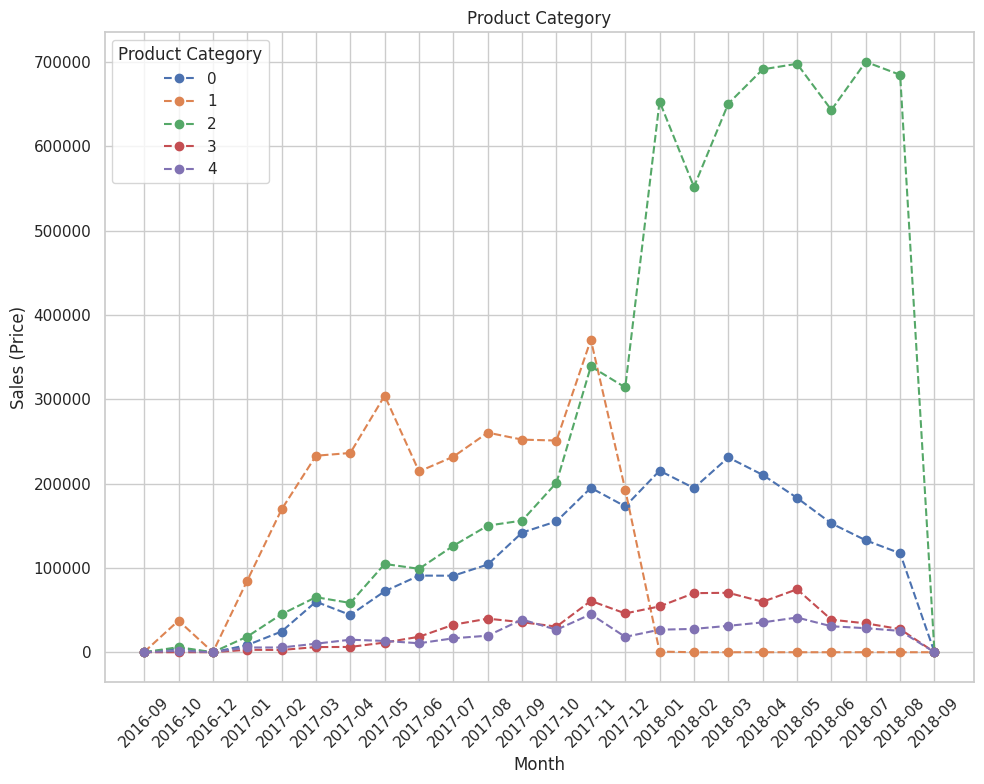

'\nCluster 0 (สินค้าหลัก)\nCluster 1 (สินค้าขายช้า)\nCluster 2 (สินค้าปานกลาง)\nCluster 3 (สินค้าพิเศษ)\nCluster 4 (สินค้าพรีเมียม)\n'

In [ ]:
category_sales_summary_g = olist_times_items.groupby(['order_purchase_year_month', 'Cluster'])['price'].sum().reset_index()

top_category_sum_pivot = category_sales_summary_g.pivot(
    index='order_purchase_year_month',
    columns='Cluster',
    values='price'
).fillna(0)

plt.figure(figsize=(10, 8))
sns.set(style="whitegrid")

for category in top_category_sum_pivot.columns:
    plt.plot(
        top_category_sum_pivot.index,
        top_category_sum_pivot[category],
        marker='o', linestyle='--', label=category
    )

plt.title('Product Category')
plt.xlabel('Month')
plt.ylabel('Sales (Price)')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.tight_layout()
plt.show()


"""
Cluster 0 (สินค้าหลัก)
Cluster 1 (สินค้าขายช้า)
Cluster 2 (สินค้าปานกลาง)
Cluster 3 (สินค้าพิเศษ)
Cluster 4 (สินค้าพรีเมียม)
"""

# **การวิเคราะห์ประสิทธิภาพการจัดส่ง (Shipping Performance Analysis)**

In [ ]:
olist_times.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'order_purchase_day', 'order_purchase_dayofweek',
       'order_purchase_dayofweek_name', 'order_purchase_hour',
       'order_purchase_weekofmonth', 'order_purchase_time_day',
       'delivery_time', 'delivery_time_day', 'delivery_time_hour'],
      dtype='object')

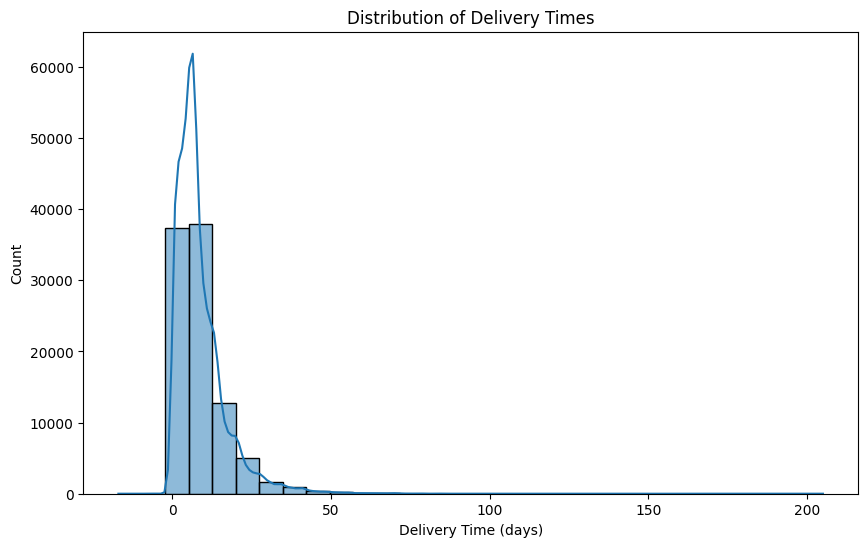

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(olist_times['delivery_time_day'].dropna(), bins=30, kde=True)
plt.xlabel('Delivery Time (days)')
plt.title('Distribution of Delivery Times')
plt.show()

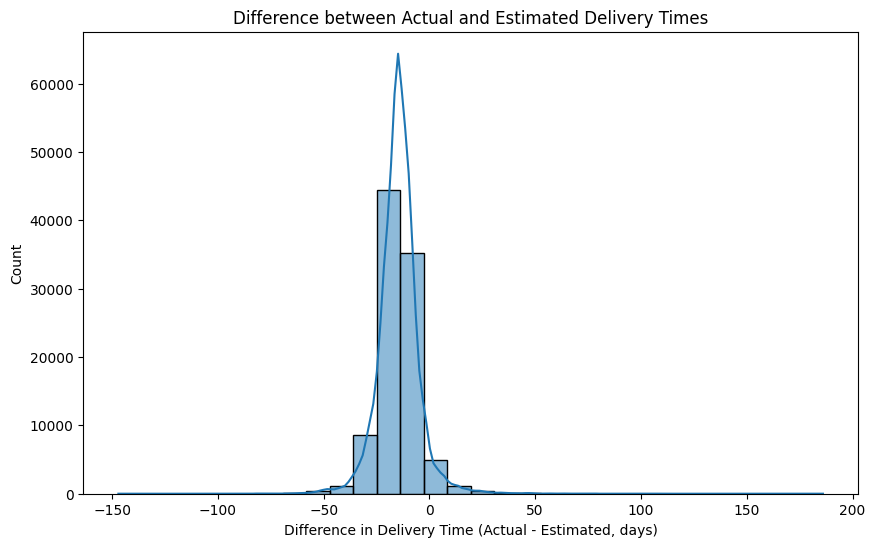

In [ ]:
# คำนวณเวลาจัดส่งที่คาดการณ์
olist_times['estimated_delivery_days'] = (olist_times['order_estimated_delivery_date'] - olist_times['order_purchase_timestamp']).dt.days

# ความแตกต่างระหว่างเวลาจัดส่งจริงและที่คาดการณ์
olist_times['delivery_time_diff'] = olist_times['delivery_time_day'] - olist_times['estimated_delivery_days']

# แสดงการกระจายของ 'delivery_time_diff'
plt.figure(figsize=(10,6))
sns.histplot(olist_times['delivery_time_diff'].dropna(), bins=30, kde=True)
plt.xlabel('Difference in Delivery Time (Actual - Estimated, days)')
plt.title('Difference between Actual and Estimated Delivery Times')
plt.show()


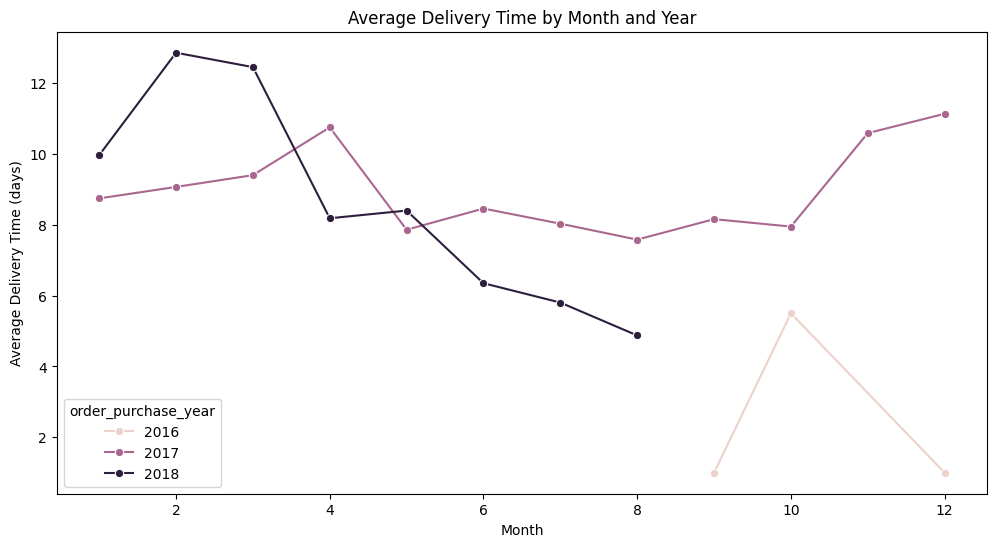

In [ ]:
# กลุ่มข้อมูลตามปีและเดือน
delivery_by_month = olist_times.groupby(['order_purchase_year', 'order_purchase_month'])['delivery_time_day'].mean().reset_index()

# การแสดงผล
plt.figure(figsize=(12,6))
sns.lineplot(data=delivery_by_month, x='order_purchase_month', y='delivery_time_day', hue='order_purchase_year', marker='o')
plt.xlabel('Month')
plt.ylabel('Average Delivery Time (days)')
plt.title('Average Delivery Time by Month and Year')
plt.show()


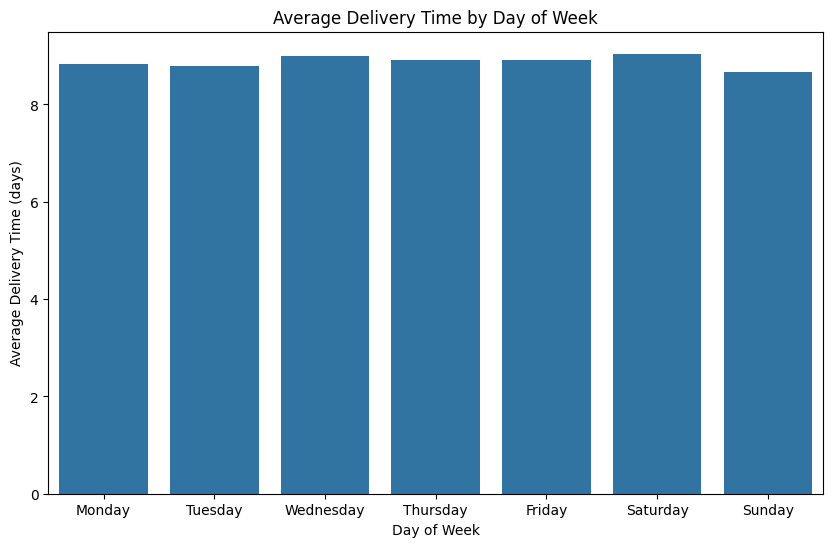

In [ ]:
# ค่าเฉลี่ยเวลาจัดส่งตามวันในสัปดาห์
delivery_by_dayofweek = olist_times.groupby('order_purchase_dayofweek_name')['delivery_time_day'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# การแสดงผล
plt.figure(figsize=(10,6))
sns.barplot(x=delivery_by_dayofweek.index, y=delivery_by_dayofweek.values)
plt.xlabel('Day of Week')
plt.ylabel('Average Delivery Time (days)')
plt.title('Average Delivery Time by Day of Week')
plt.show()


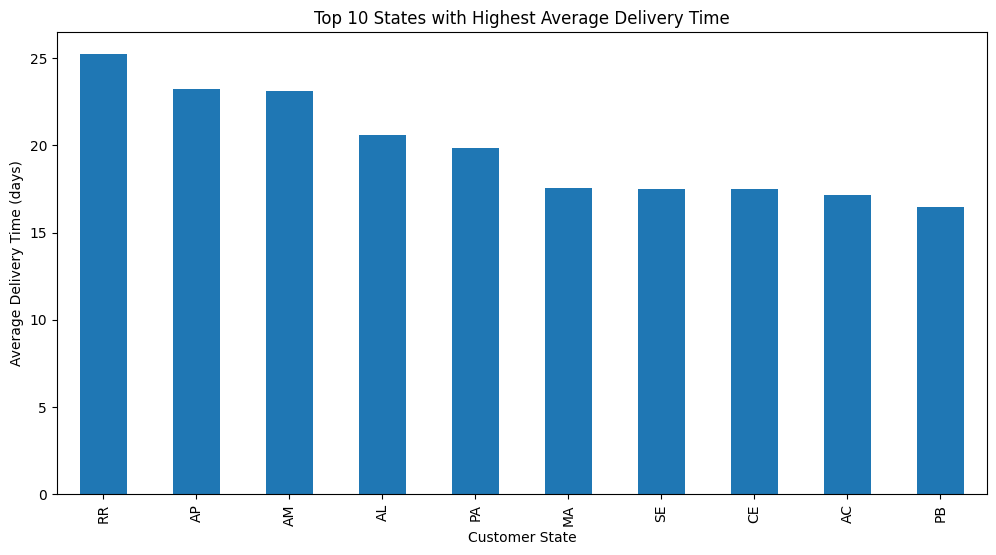

In [ ]:
# ค่าเฉลี่ยเวลาจัดส่งตามรัฐของลูกค้า
delivery_by_state = olist_times.groupby('customer_state')['delivery_time_day'].mean().sort_values(ascending=False)

# แสดงรัฐที่มีเวลาจัดส่งเฉลี่ยสูงสุด 10 อันดับแรก
plt.figure(figsize=(12,6))
delivery_by_state.head(10).plot(kind='bar')
plt.xlabel('Customer State')
plt.ylabel('Average Delivery Time (days)')
plt.title('Top 10 States with Highest Average Delivery Time')
plt.show()


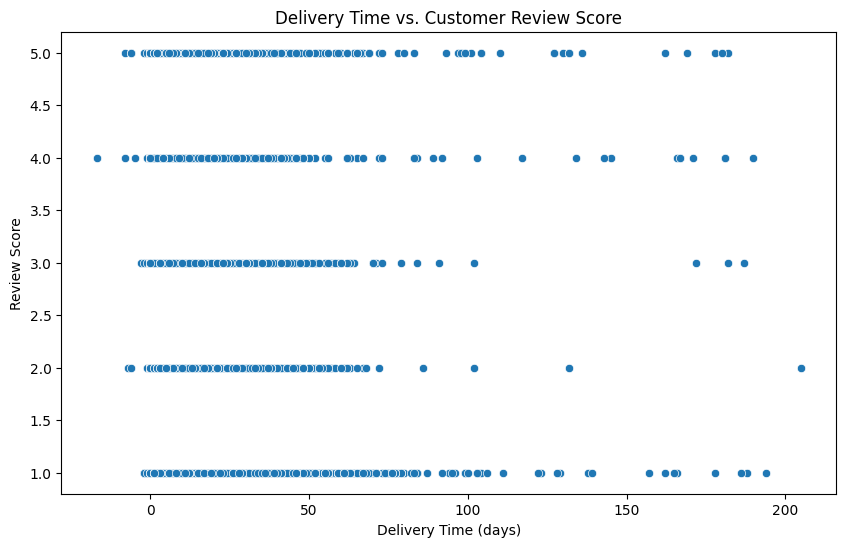

Correlation between Delivery Time and Review Score:
                   delivery_time_day  review_score
delivery_time_day           1.000000     -0.298404
review_score               -0.298404      1.000000


In [ ]:
# โหลดข้อมูลรีวิว
reviews = olist_order_reviews
reviews['review_creation_date'] = pd.to_datetime(reviews['review_creation_date'])

# รวมกับ olist_times
olist_full = pd.merge(olist_times, reviews[['order_id', 'review_score']], on='order_id', how='left')

# กราฟกระจายของเวลาจัดส่งเทียบกับคะแนนรีวิว
plt.figure(figsize=(10,6))
sns.scatterplot(data=olist_full, x='delivery_time_day', y='review_score')
plt.xlabel('Delivery Time (days)')
plt.ylabel('Review Score')
plt.title('Delivery Time vs. Customer Review Score')
plt.show()

# คำนวณค่าสหสัมพันธ์
correlation = olist_full[['delivery_time_day', 'review_score']].corr()
print('Correlation between Delivery Time and Review Score:')
print(correlation)


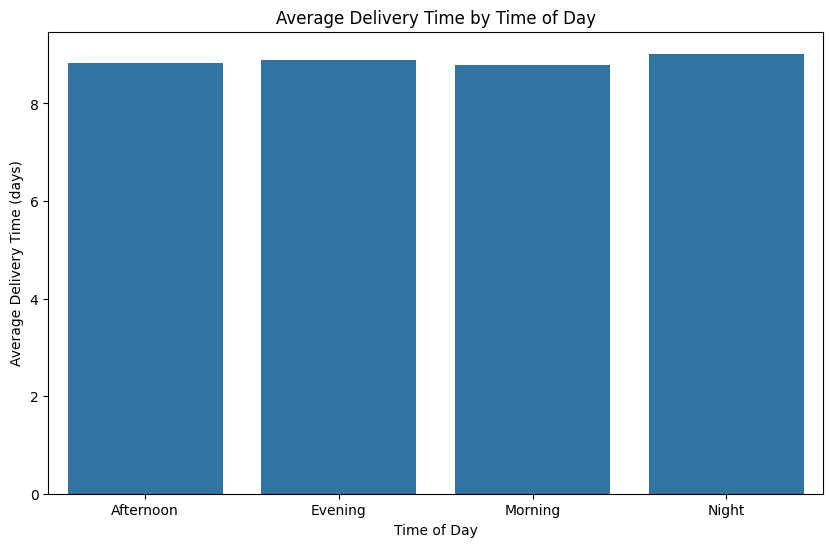

In [ ]:
# ค่าเฉลี่ยเวลาจัดส่งตามช่วงเวลาของวัน
delivery_by_time_day = olist_times.groupby('order_purchase_time_day')['delivery_time_day'].mean()

# การแสดงผล
plt.figure(figsize=(10,6))
sns.barplot(x=delivery_by_time_day.index, y=delivery_by_time_day.values)
plt.xlabel('Time of Day')
plt.ylabel('Average Delivery Time (days)')
plt.title('Average Delivery Time by Time of Day')
plt.show()


In [ ]:
# ตัวอย่างการใช้ Linear Regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# เลือกคุณลักษณะที่เกี่ยวข้อง
features = ['order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_month', 'estimated_delivery_days']
X = olist_times[features]
y = olist_times['delivery_time_day']

# จัดการกับค่าที่ขาดหายและเข้ารหัสตัวแปรเชิงหมวดหมู่หากจำเป็น
X = X.dropna()
y = y.loc[X.index]

# แปลงตัวแปรเชิงหมวดหมู่
X = pd.get_dummies(X, columns=['order_purchase_dayofweek', 'order_purchase_hour', 'order_purchase_month'])

# แบ่งข้อมูล
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ประเมินโมเดล
from sklearn.metrics import mean_absolute_error, r2_score

# สร้างโมเดล
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)



ValueError: Input y contains NaN.

In [ ]:
olist_order_times = (olist_times.merge(olist_order_items,on='order_id')
                                           .merge(olist_sellers,on='seller_id'))
olist_order_times

order_id                       customer_id  \
0       e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1       53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2       47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3       949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4       ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                  ...                               ...   
112645  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
112646  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
112647  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112648  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
112649  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

       order_status order_purchase_timestamp   order_approved_at  \
0         delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1         delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2         delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3         delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4         delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   
...             ...                      ...                 ...   
112645    delivered      2018-02-06 12:58:58 2018-02-06 13:10:37   
112646    delivered      2017-08-27 14:46:43 2017-08-27 15:04:16   
112647    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
112648    delivered      2018-01-08 21:28:27 2018-01-08 21:36:21   
112649    delivered      2018-03-08 20:57:30 2018-03-09 11:20:28   

       order_delivered_carrier_date order_delivered_customer_date  \
0               2017-10-04 19:55:00           2017-10-10 21:25:13   
1               2018-07-26 14:31:00           2018-08-07 15:27:45   
2               2018-08-08 13:50:00           2018-08-17 18:06:29   
3               2017-11-22 13:39:59           2017-12-02 00:28:42   
4               2018-02-14 19:46:34           2018-02-16 18:17:02   
...                             ...                           ...   
112645          2018-02-07 23:22:42           2018-02-28 17:37:56   
112646          2017-08-28 20:52:26           2017-09-21 11:24:17   
112647          2018-01-12 15:35:03           2018-01-25 23:32:54   
112648          2018-01-12 15:35:03           2018-01-25 23:32:54   
112649          2018-03-09 22:11:59           2018-03-16 13:08:30   

       order_estimated_delivery_date                customer_unique_id  \
0                         2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                         2018-08-13  af07308b275d755c9edb36a90c618231   
2                         2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   
3                         2017-12-15  7c142cf63193a1473d2e66489a9ae977   
4                         2018-02-26  72632f0f9dd73dfee390c9b22eb56dd6   
...                              ...                               ...   
112645                    2018-03-02  da62f9e57a76d978d02ab5362c509660   
112646                    2017-09-27  737520a9aad80b3fbbdad19b66b37b30   
112647                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
112648                    2018-02-15  5097a5312c8b157bb7be58ae360ef43c   
112649                    2018-04-03  60350aa974b26ff12caad89e55993bd6   

        customer_zip_code_prefix  ... delivery_time_hour order_item_id  \
0                           3149  ...              145.0             1   
1                          47813  ...              288.0             1   
2                          75265  ...              220.0             1   
3                          59296  ...              226.0             1   
4                           9195  ...               46.0             1   
...                          ...  ...                ...           ...   
112645                     11722  ...     

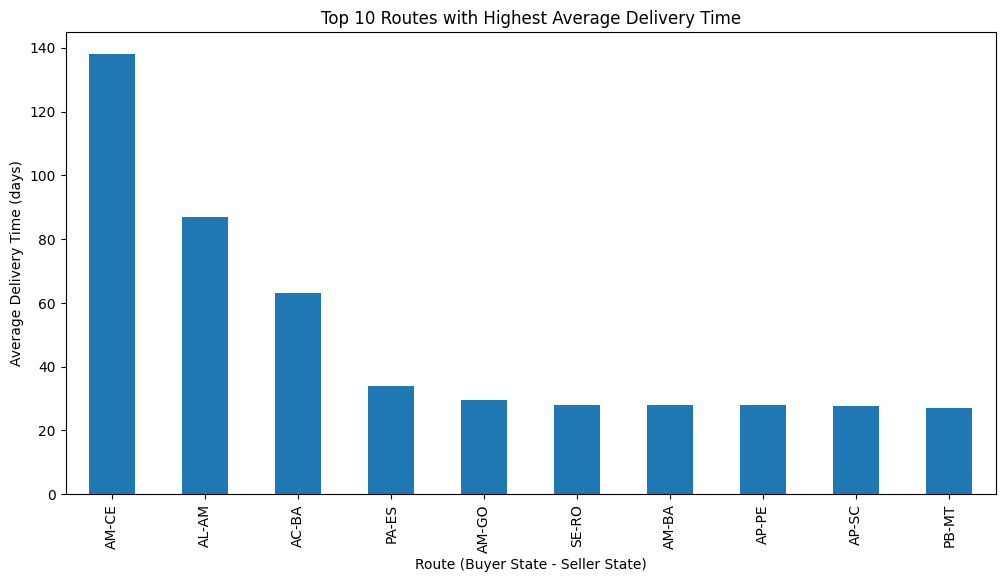

In [ ]:
olist_order_times.rename(columns={'customer_state': 'buyer_state'}, inplace=True)

olist_order_times['route'] = olist_order_times['buyer_state'] + '-' + olist_order_times['seller_state']

# คำนวณเวลาการจัดส่งเฉลี่ยตามเส้นทาง
delivery_by_route = olist_order_times.groupby('route')['delivery_time_day'].mean().sort_values(ascending=False)

# แสดงเส้นทางที่มีเวลาการจัดส่งเฉลี่ยสูงสุด 10 อันดับแรก
plt.figure(figsize=(12,6))
delivery_by_route.head(10).plot(kind='bar')
plt.xlabel('Route (Buyer State - Seller State)')
plt.ylabel('Average Delivery Time (days)')
plt.title('Top 10 Routes with Highest Average Delivery Time')
plt.show()


จำนวนเส้นทางที่มีคำสั่งซื้ออย่างน้อย 100 รายการ: 77
   route  delivery_time_day
0  SP-SP                6.0
1  BA-SP               12.0
2  GO-SP                9.0
4  SP-SP                1.0
5  PR-SP               14.0


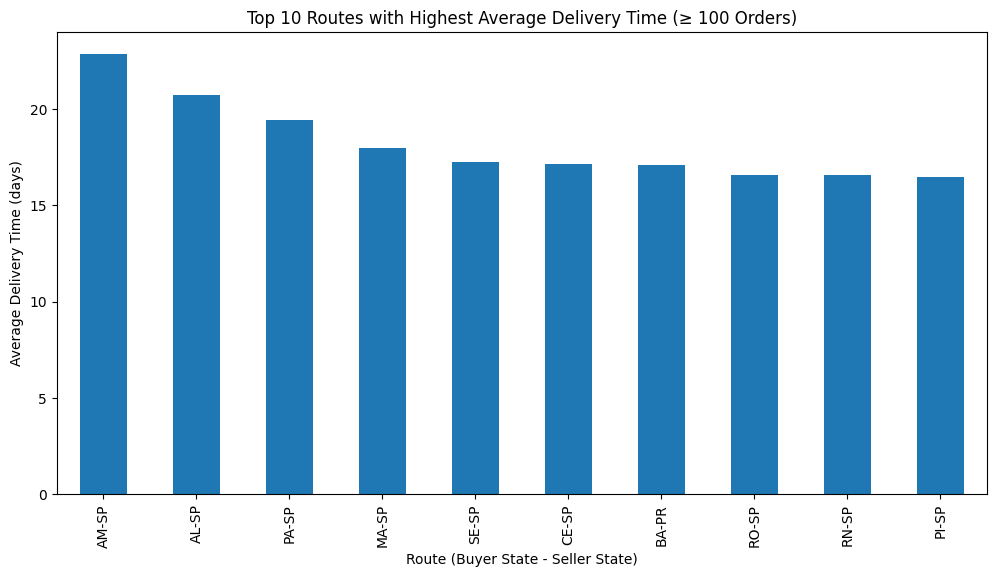

In [ ]:
route_counts = olist_order_times['route'].value_counts()
routes_with_min_orders = route_counts[route_counts >= 100].index
# กรองข้อมูลใน olist_order_times
olist_filtered = olist_order_times[olist_order_times['route'].isin(routes_with_min_orders)]
# ตรวจสอบจำนวนเส้นทางที่เหลืออยู่
print(f'จำนวนเส้นทางที่มีคำสั่งซื้ออย่างน้อย 100 รายการ: {len(routes_with_min_orders)}')

# ตรวจสอบ DataFrame ที่กรองแล้ว
print(olist_filtered[['route', 'delivery_time_day']].head())
# คำนวณเวลาการจัดส่งเฉลี่ยตามเส้นทางที่กรองแล้ว
delivery_by_route_filtered = olist_filtered.groupby('route')['delivery_time_day'].mean().sort_values(ascending=False)

# แสดงเส้นทางที่มีเวลาการจัดส่งเฉลี่ยสูงสุด 10 อันดับแรก
plt.figure(figsize=(12,6))
delivery_by_route_filtered.head(10).plot(kind='bar')
plt.xlabel('Route (Buyer State - Seller State)')
plt.ylabel('Average Delivery Time (days)')
plt.title('Top 10 Routes with Highest Average Delivery Time (≥ 100 Orders)')
plt.show()


# **การสร้างโมเดลทำนาย (Predictive Modeling)**

In [ ]:
olist_predic = (olist_times.merge(olist_order_items, on='order_id')
                                            .merge(olist_products, on='product_id')
                                  )



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
olist_predic.columns


Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'order_purchase_day', 'order_purchase_dayofweek',
       'order_purchase_dayofweek_name', 'order_purchase_hour',
       'order_purchase_weekofmonth', 'order_purchase_time_day',
       'delivery_time', 'delivery_time_day', 'delivery_time_hour',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning:

No supported index is available. In the 

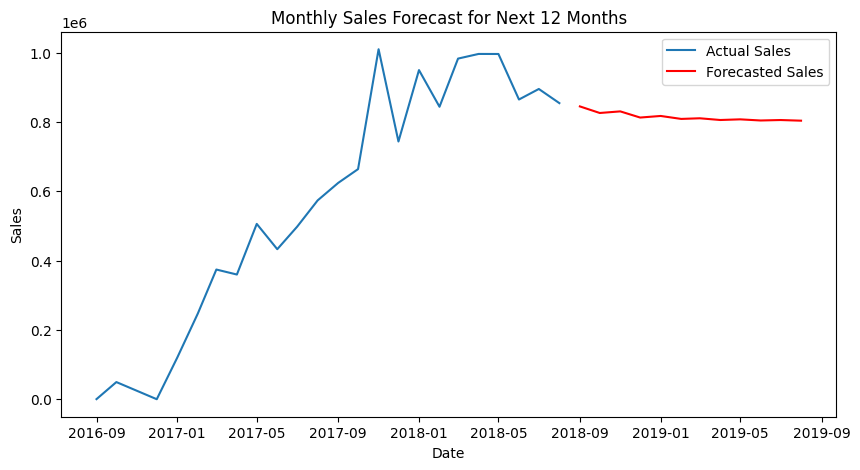

In [ ]:
# กรองข้อมูลถึง 2018-08
olist_predic = olist_predic[olist_predic['order_purchase_timestamp'] <= '2018-08-31']

# สร้าง DataFrame สำหรับยอดขายรายเดือน
monthly_sales = olist_predic.groupby('order_purchase_year_month')['price'].sum().reset_index()
monthly_sales.columns = ['year_month', 'sales']
monthly_sales['year_month'] = pd.to_datetime(monthly_sales['year_month'], format='%Y-%m')

# ตั้ง year_month เป็น index
monthly_sales.set_index('year_month', inplace=True)

# สร้างโมเดล ARIMA
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(monthly_sales['sales'], order=(5, 1, 0))
model_fit = model.fit()

# พยากรณ์ยอดขาย 12 เดือนข้างหน้า
forecast = model_fit.forecast(steps=12)
forecast_dates = pd.date_range(monthly_sales.index[-1] + pd.offsets.MonthBegin(), periods=12, freq='MS')

# แสดงผล
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(monthly_sales.index, monthly_sales['sales'], label='Actual Sales')
plt.plot(forecast_dates, forecast, label='Forecasted Sales', color='red')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecast for Next 12 Months')
plt.legend()
plt.show()


In [ ]:
# กำหนดสถานะคำสั่งซื้อที่ถูกยกเลิก
olist_predic['is_canceled'] = olist_predic['order_status'].apply(lambda x: 1 if x == 'canceled' else 0)

# เลือกฟีเจอร์สำหรับโมเดล
features = ['order_purchase_dayofweek', 'order_purchase_hour', 'delivery_time_day']
X = olist_predic[features].fillna(0)
y = olist_predic['is_canceled']

# แบ่งข้อมูลเป็นชุดฝึกและทดสอบ
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล RandomForest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# ทำนายผล
y_pred = model.predict(X_test)

# แสดงผล
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[22402     2]
 [  126     0]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     22404
           1       0.00      0.00      0.00       126

    accuracy                           0.99     22530
   macro avg       0.50      0.50      0.50     22530
weighted avg       0.99      0.99      0.99     22530



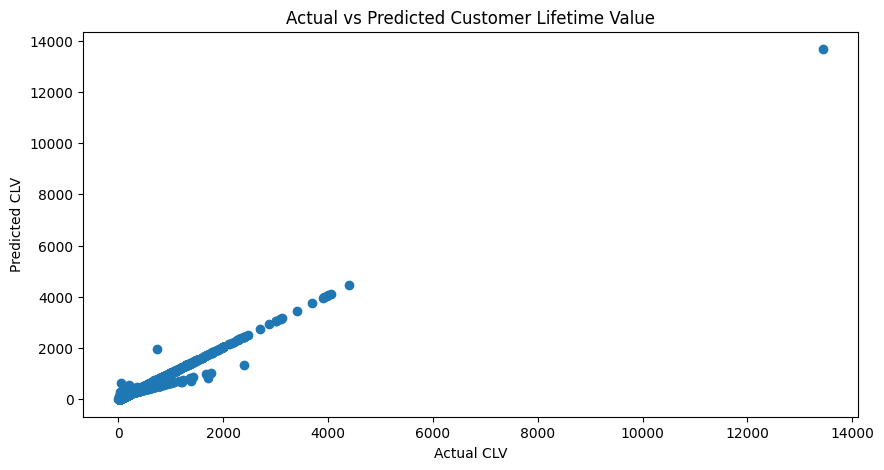

In [ ]:
# คำนวณยอดขายรวมและจำนวนคำสั่งซื้อต่อลูกค้า
customer_sales = olist_predic.groupby('customer_unique_id')['price'].sum().reset_index()
customer_sales.columns = ['customer_unique_id', 'total_sales']

customer_orders = olist_predic.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_orders.columns = ['customer_unique_id', 'total_orders']

# รวมข้อมูล
customer_data = pd.merge(customer_sales, customer_orders, on='customer_unique_id')
customer_data['avg_order_value'] = customer_data['total_sales'] / customer_data['total_orders']

# เลือกฟีเจอร์
features = ['total_orders', 'avg_order_value']
X = customer_data[features]
y = customer_data['total_sales']

# แบ่งข้อมูล
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# สร้างโมเดล LinearRegression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

# ทำนาย
y_pred = model.predict(X_test)

# แสดงผล
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted Customer Lifetime Value')
plt.show()


In [ ]:
# กำหนดว่าลูกค้าซื้อซ้ำหรือไม่
customer_repeat = olist_predic.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_repeat.columns = ['customer_unique_id', 'total_orders']
customer_repeat['repeat_purchase'] = customer_repeat['total_orders'].apply(lambda x: 1 if x > 1 else 0)

# เลือกฟีเจอร์
features = ['total_orders']
X = customer_repeat[features]
y = customer_repeat['repeat_purchase']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[18490     0]
 [    0   594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18490
           1       1.00      1.00      1.00       594

    accuracy                           1.00     19084
   macro avg       1.00      1.00      1.00     19084
weighted avg       1.00      1.00      1.00     19084



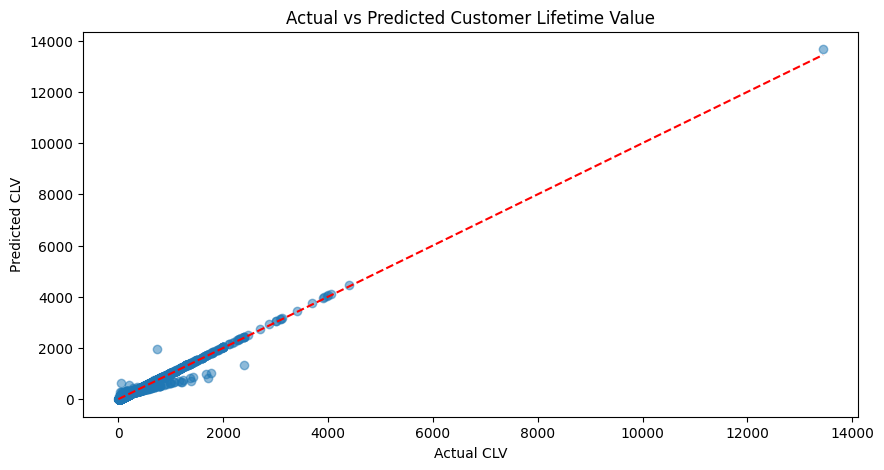

In [ ]:
olist_predic['order_purchase_timestamp'] = pd.to_datetime(olist_predic['order_purchase_timestamp'])

customer_sales = olist_predic.groupby('customer_unique_id')['price'].sum().reset_index()
customer_sales.columns = ['customer_unique_id', 'total_sales']

customer_orders = olist_predic.groupby('customer_unique_id')['order_id'].nunique().reset_index()
customer_orders.columns = ['customer_unique_id', 'total_orders']

customer_data = customer_sales.merge(customer_orders, on='customer_unique_id')

customer_data['avg_order_value'] = customer_data['total_sales'] / customer_data['total_orders']

features = ['total_orders', 'avg_order_value']
X = customer_data[features]
y = customer_data['total_sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual CLV')
plt.ylabel('Predicted CLV')
plt.title('Actual vs Predicted Customer Lifetime Value')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # เส้น 45 องศา
plt.show()

# **การวิเคราะห์ตลาดรถเข็น (Market Basket Analysis)**

In [ ]:
import mlxtend
print(mlxtend.__version__)

0.23.1


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
# Optional: Visualize the top association rules
import networkx as nx

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [ ]:
olist_predic = (olist_times.merge(olist_order_items, on='order_id')
                                            .merge(olist_products, on='product_id')
                                  )

# Merge the translation into olist_predic
olist_predic = olist_predic.merge(product_translation, on='product_category_name', how='left')

# Drop any rows where 'product_category_name_english' is NaN
olist_predic = olist_predic.dropna(subset=['product_category_name_english'])

# Create a list of transactions (each transaction is a list of product categories purchased together)
transactions = olist_predic.groupby('order_id')['product_category_name_english'].apply(list).tolist()

print(f"Total transactions: {len(transactions)}")

# ตรวจสอบบางตัวอย่างของ transactions
print("Sample transactions:")
for i in range(5):
    print(transactions[i])

# ตรวจสอบความถี่ของแต่ละ item
from collections import Counter

item_counts = Counter([item for sublist in transactions for item in sublist])
item_df = pd.DataFrame.from_dict(item_counts, orient='index', columns=['count']).sort_values(by='count', ascending=False)
item_df['support'] = item_df['count'] / len(transactions)

print("Top 10 items by support:")
print(item_df.head(10))

# Initialize and fit the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
transaction_df = pd.DataFrame(te_ary, columns=te.columns_)

print(f"Transaction DataFrame shape: {transaction_df.shape}")

# Generate frequent itemsets using the Apriori algorithm
# ลองปรับลด min_support เพื่อให้พบ frequent itemsets มากขึ้น
frequent_itemsets = apriori(transaction_df, min_support=0.005, use_colnames=True, verbose=1)

print(f"Number of frequent itemsets found: {len(frequent_itemsets)}")
print(frequent_itemsets.head())

# Generate association rules from the frequent itemsets
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)

print(f"Number of association rules generated: {len(rules)}")
print(rules.head())

# ตรวจสอบว่ามี rules หรือไม่ก่อนพยายามเข้าถึงข้อมูล
if not rules.empty:
    # Sort the rules by confidence
    rules = rules.sort_values(by='confidence', ascending=False)

    # Display the top 10 association rules
    print("Top 10 association rules:")
    print(rules.head(10))

    # Optional: Visualize the top association rules
    def draw_graph(rules, rules_to_show):
        G = nx.DiGraph()

        for i in range(min(rules_to_show, len(rules))):
            antecedents = ', '.join(list(rules.iloc[i]['antecedents']))
            consequents = ', '.join(list(rules.iloc[i]['consequents']))
            G.add_edge(antecedents, consequents, weight=rules.iloc[i]['confidence'])

        pos = nx.spring_layout(G, k=0.5, scale=2)
        plt.figure(figsize=(12,8))
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12, font_weight='bold', arrows=True)
        labels = nx.get_edge_attributes(G,'weight')
        nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k, v in labels.items()})
        plt.title('Association Rules Network')
        plt.show()

    # Draw the graph for the top 10 rules
    draw_graph(rules, 10)
else:
    print("No association rules were generated. Consider lowering the min_support or min_threshold parameters.")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Total transactions: 97256
Sample transactions:
['cool_stuff']
['pet_shop']
['furniture_decor']
['perfumery']
['garden_tools']
Top 10 items by support:
                       count   support
bed_bath_table         11115  0.114286
health_beauty           9670  0.099428
sports_leisure          8641  0.088848
furniture_decor         8334  0.085691
computers_accessories   7827  0.080478
housewares              6964  0.071605
watches_gifts           5991  0.061600
telephony               4545  0.046732
garden_tools            4347  0.044696
auto                    4235  0.043545
Transaction DataFrame shape: (97256, 71)
Processing 702 combinations | Sampling itemset size 2
Number of frequent itemsets found: 27
    support                  itemsets
0  0.040070                    (auto)
1  0.029664                    (baby)
2  0.096827          (bed_bath_table)
3  0.005264  (books_general_interest)
4  0.068777   (computers_accessories)
Number of association rules generated: 0
Empty DataFrame
Co

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Average number of items per transaction: 1.14
Transactions with multiple items: 9652 out of 97256


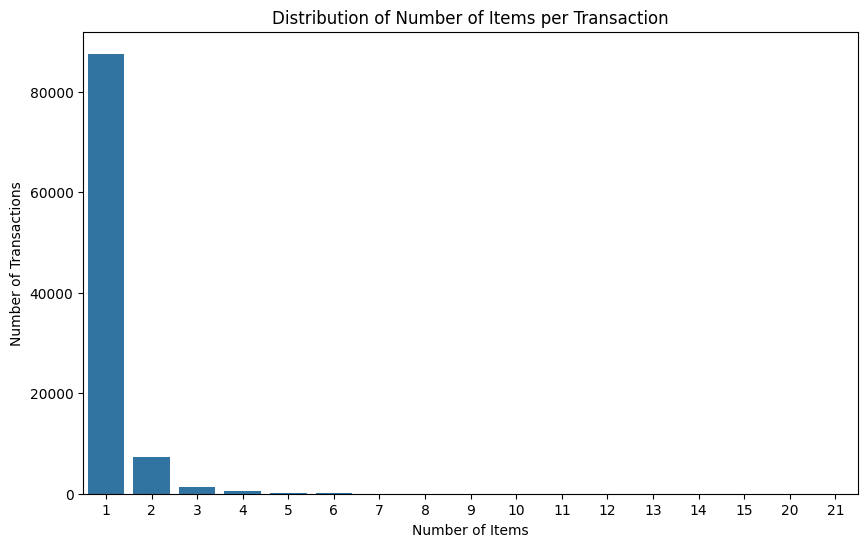

In [ ]:

# ตรวจสอบจำนวนไอเท็มในแต่ละธุรกรรม
transaction_sizes = [len(transaction) for transaction in transactions]
average_items = np.mean(transaction_sizes)
print(f"Average number of items per transaction: {average_items:.2f}")
print(f"Transactions with multiple items: {sum(1 for size in transaction_sizes if size > 1)} out of {len(transactions)}")

# แสดงการแจกแจงของจำนวนไอเท็มในธุรกรรม
plt.figure(figsize=(10,6))
sns.countplot(x=transaction_sizes)
plt.title('Distribution of Number of Items per Transaction')
plt.xlabel('Number of Items')
plt.ylabel('Number of Transactions')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-29-789f2987e772>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




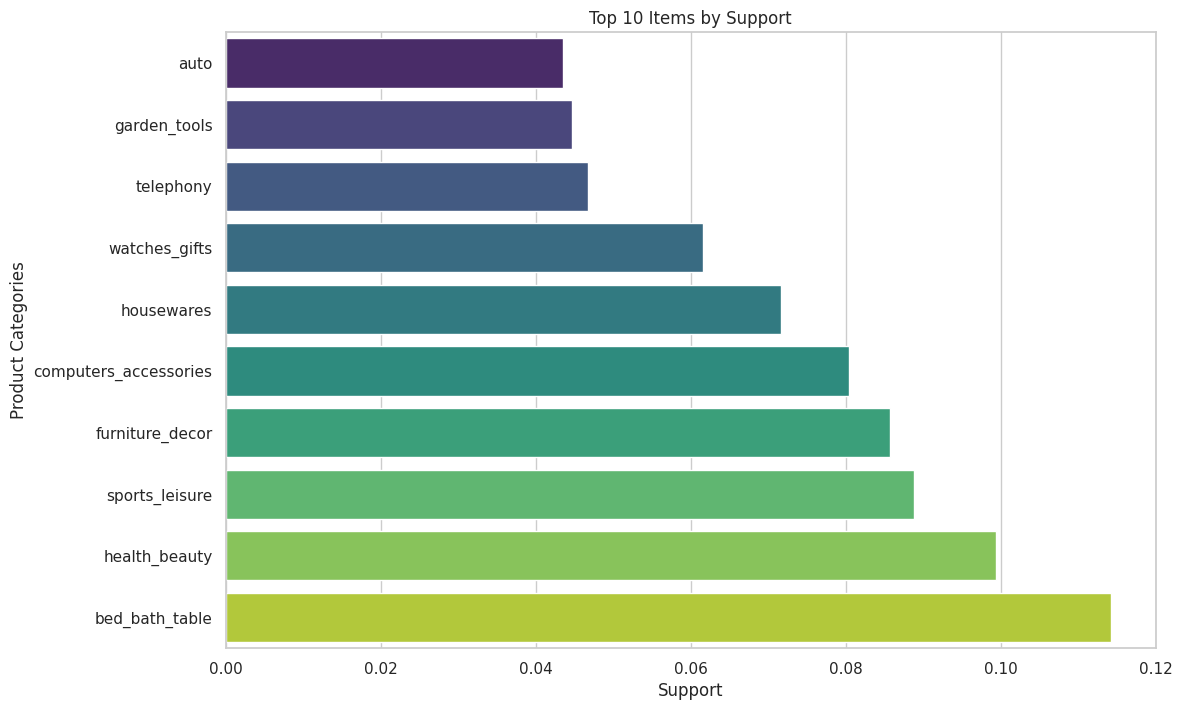

In [ ]:
# กำหนดสไตล์ของ Seaborn
sns.set(style="whitegrid")

# ดึงข้อมูล Top 10 items by support
top_items = item_df.head(10).sort_values(by='support', ascending=True)

plt.figure(figsize=(12, 8))
sns.barplot(x='support', y=top_items.index, data=top_items, palette='viridis')
plt.title('Top 10 Items by Support')
plt.xlabel('Support')
plt.ylabel('Product Categories')
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

<ipython-input-31-a92b4548b00d>:8: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




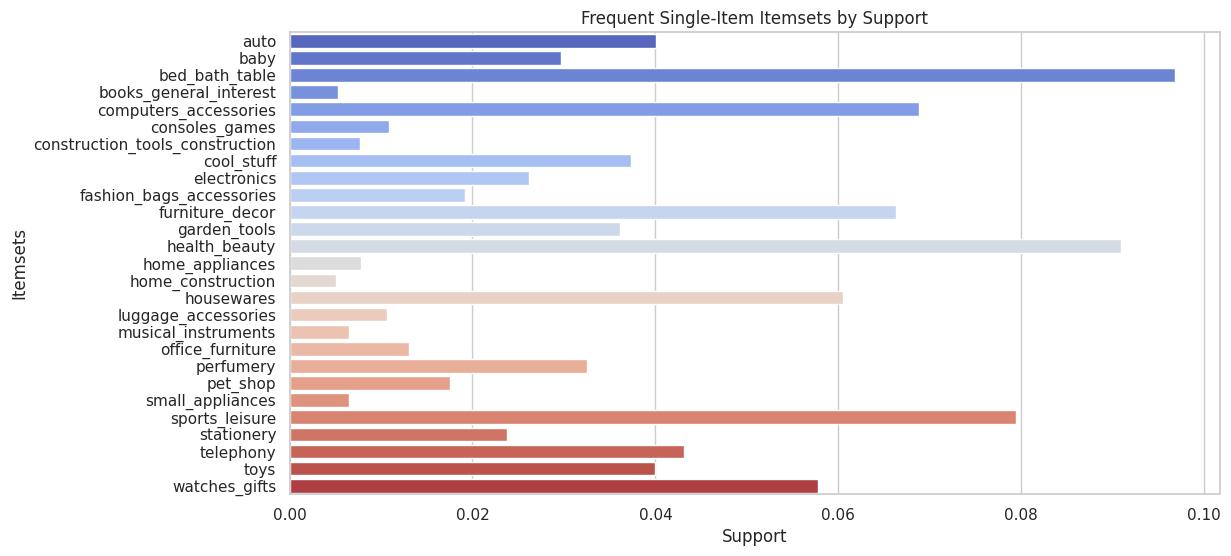

In [ ]:
# ตรวจสอบว่า frequent_itemsets มี itemsets ขนาด 1 หรือมากกว่า
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# กรอง frequent itemsets ที่มีขนาด 1 เท่านั้น
single_item_frequent = frequent_itemsets[frequent_itemsets['length'] == 1]

plt.figure(figsize=(12, 6))
sns.barplot(x='support', y=single_item_frequent['itemsets'].apply(lambda x: list(x)[0]), data=single_item_frequent.sort_values(by='support', ascending=True), palette='coolwarm')
plt.title('Frequent Single-Item Itemsets by Support')
plt.xlabel('Support')
plt.ylabel('Itemsets')
plt.show()


# **การทำนายการซื้อซ้ำ/การเลิกใช้บริการของลูกค้า (Customer Retention/Churn Prediction)**

In [ ]:
olist_predic = (olist_times.merge(olist_order_items, on='order_id')
                                            .merge(olist_products, on='product_id')
                                            .merge(olist_order_payments, on='order_id')
                                            .merge(olist_order_reviews, on='order_id')
                                  )
olist_predic.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'order_purchase_day', 'order_purchase_dayofweek',
       'order_purchase_dayofweek_name', 'order_purchase_hour',
       'order_purchase_weekofmonth', 'order_purchase_time_day',
       'delivery_time', 'delivery_time_day', 'delivery_time_hour',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width

In [ ]:
olist_predic['total_orders'] = olist_predic.groupby('customer_unique_id')['order_id'].transform('nunique')
olist_predic['total_order_value'] = olist_predic.groupby('customer_unique_id')['price'].transform('sum')
olist_predic['avg_order_value'] = (olist_predic['total_order_value'] / olist_predic['total_orders'])
olist_predic['days_since_last_order'] = (olist_predic['order_purchase_timestamp'].max() - olist_predic['order_purchase_timestamp']).dt.days
olist_predic['last_order'] = olist_predic.groupby('customer_unique_id')['days_since_last_order'].transform('min')
olist_predic['average_payment_value'] = olist_predic.groupby('payment_type')['payment_value'].transform('mean')
olist_predic['average_review_score'] = olist_predic.groupby('customer_unique_id')['review_score'].transform('mean')
olist_predic['total_reviews'] = olist_predic.groupby('customer_unique_id')['review_id'].transform('count')
olist_predic['product_diversity'] = olist_predic.groupby('customer_unique_id')['product_id'].transform('nunique')

olist_predic.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_purchase_year', 'order_purchase_month',
       'order_purchase_month_name', 'order_purchase_year_month',
       'order_purchase_date', 'order_purchase_day', 'order_purchase_dayofweek',
       'order_purchase_dayofweek_name', 'order_purchase_hour',
       'order_purchase_weekofmonth', 'order_purchase_time_day',
       'delivery_time', 'delivery_time_day', 'delivery_time_hour',
       'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date',
       'price', 'freight_value', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width

In [ ]:
olist_predic['churn'] = olist_predic['days_since_last_order'].apply(lambda x: 1 if x > 90 else 0)
olist_predic.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date                customer_unique_id  \
0                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
1                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
2                    2017-10-18  7c396fd4830fd04220f754e42b4e5bff   
3                    2018-08-13  af07308b275d755c9edb36a90c618231   
4                    2018-09-04  3a653a41f6f9fc3d2a113cf8398680e8   

   customer_zip_code_prefix  ... total_orders total_order_value  \
0                      3149  ...            2            125.36   
1                      3149  ...            2            125.36   
2                      3149  ...            2            125.36   
3                     47813  ...            1            118.70   
4                     75265  ...            1            159.90   

   avg_order_value  days_since_last_order last_order average_payment_value  \
0            62.68                    335        335            179.011599   
1            62.68                    335        335             64.248868   
2            62.68                    335        335             64.248868   
3           118.70                     40         40            177.022206   
4           159.90                     26         26            179.011599   

  average_review_score  total_reviews  product_diversity churn  
0                 4.25              4                  2     1  
1                 4.25              4                  2     1  
2                 4.25              4                  2     1  
3                 4.00              1                  1     0  
4                 5.00              1                  1     0  

[5 rows x 60 columns]

In [ ]:
# จัดกลุ่มข้อมูลตาม customer_unique_id และคำนวณค่าต่างๆ
customer_grouped = olist_predic.groupby('customer_unique_id')

customer_df = customer_grouped.agg({
    'order_id': 'nunique',  # total_orders
    'days_since_last_order': 'min',  # days_since_last_order
    'price': 'sum',  # total_order_value
    'delivery_time_day': 'mean',  # delivery_time
    'review_score': ['mean', 'last'],  # average_review_score, review_score
    'product_id': 'nunique',  # product_diversity
    'payment_value': 'sum',  # payment_value
    'churn': 'max',  # churn
})

# แปลงชื่อคอลัมน์ที่มีหลายระดับให้อยู่ในระดับเดียว
customer_df.columns = ['_'.join(col).strip() for col in customer_df.columns.values]

# เปลี่ยนชื่อคอลัมน์ให้ตรงกับที่ต้องการ
customer_df.rename(columns={
    'order_id_nunique': 'total_orders',
    'days_since_last_order_min': 'days_since_last_order',
    'price_sum': 'total_order_value',
    'delivery_time_day_mean': 'delivery_time',
    'review_score_mean': 'average_review_score',
    'review_score_last': 'review_score',
    'product_id_nunique': 'product_diversity',
    'payment_value_sum': 'payment_value',
    'churn_max': 'churn',
}, inplace=True)

# คำนวณค่า avg_order_value
customer_df['avg_order_value'] = customer_df['total_order_value'] / customer_df['total_orders']

# รีเซ็ต index เพื่อให้ customer_unique_id กลายเป็นคอลัมน์
customer_df = customer_df.reset_index()

# จัดเรียงคอลัมน์ตามที่ต้องการ
customer_df = customer_df[['customer_unique_id', 'total_orders', 'days_since_last_order', 'total_order_value',
                           'avg_order_value', 'delivery_time', 'review_score',
                           'product_diversity', 'payment_value', 'average_review_score', 'churn']]

# ดูข้อมูลที่ได้
customer_df.head()

customer_unique_id  total_orders  days_since_last_order  \
0  0000366f3b9a7992bf8c76cfdf3221e2             1                    115   
1  0000b849f77a49e4a4ce2b2a4ca5be3f             1                    118   
2  0000f46a3911fa3c0805444483337064             1                    541   
3  0000f6ccb0745a6a4b88665a16c9f078             1                    325   
4  0004aac84e0df4da2b147fca70cf8255             1                    292   

   total_order_value  avg_order_value  delivery_time  review_score  \
0             129.90           129.90            4.0             5   
1              18.90            18.90            1.0             4   
2              69.00            69.00           23.0             3   
3              25.99            25.99           19.0             4   
4             180.00           180.00           11.0             5   

   product_diversity  payment_value  average_review_score  churn  
0                  1         141.90                   5.0      1  
1                  1          27.19                   4.0      1  
2                  1          86.22                   3.0      1  
3                  1          43.62                   4.0      1  
4                  1         196.89                   5.0      1

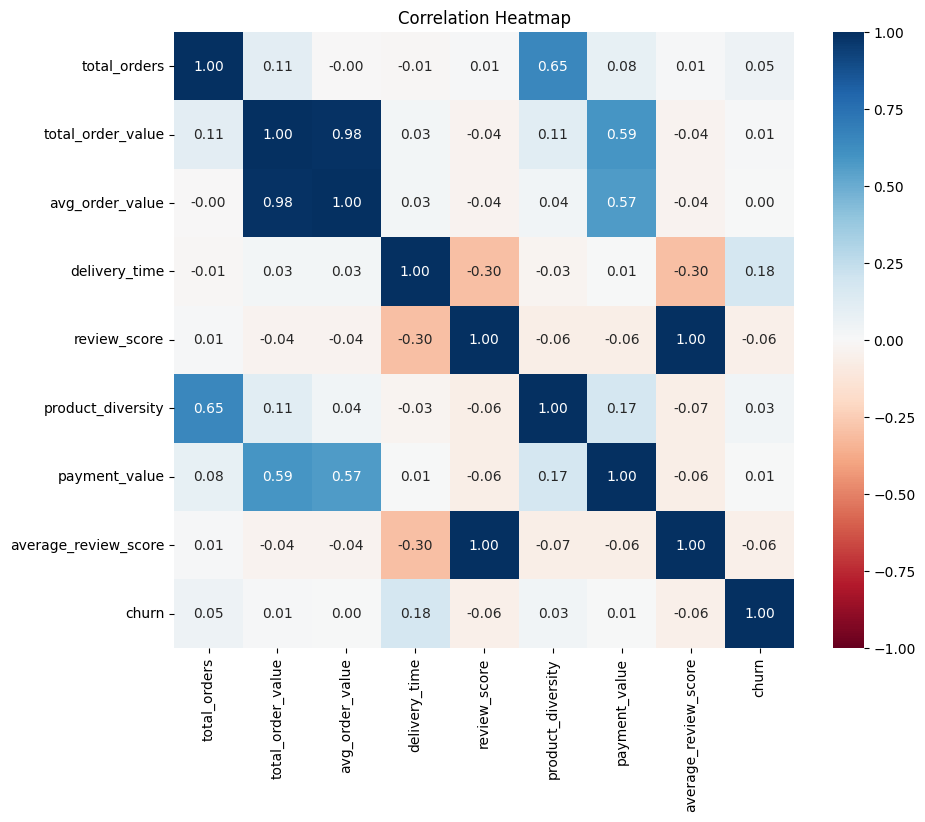

In [ ]:
olist_predic_churn= [
    'total_orders', 'total_order_value',
                      'avg_order_value', 'delivery_time', 'review_score',
                      'product_diversity', 'payment_value', 'average_review_score', 'churn'
]

numeric_df = customer_df[olist_predic_churn]

corr = numeric_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='RdBu', vmin=-1, vmax=1, annot=True, fmt='.2f', cbar=True)
plt.title("Correlation Heatmap")
plt.show()


In [ ]:
# ตัวแปรอิสระ (X) และตัวแปรตาม (y)
X = numeric_df.drop('churn', axis=1)
y = numeric_df['churn']

# แบ่งข้อมูลเป็น2ชุด
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# รีเซ็ต index ของ X_train และ X_test
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

# เปลี่ยนชื่อคอลัมน์โดยตรง
X_train.columns = [f'feature_{i}' for i in range(X_train.shape[1])]
X_test.columns = [f'feature_{i}' for i in range(X_test.shape[1])]



In [ ]:
y_test

5038     1
71824    1
38356    1
49448    1
5641     1
        ..
88173    1
44584    1
93443    1
72276    1
83779    1
Name: churn, Length: 18944, dtype: int64

In [ ]:
# สร้าง TPOTClassifier ใหม่ด้วยการตั้งค่าที่ปรับปรุง
tpot = TPOTClassifier(
    generations=3,           # ลดจำนวนรอบการพัฒนา
    population_size=20,      # ลดขนาดประชากร
    verbosity=2,
    scoring='f1',
    cv=3,
    random_state=42,
    n_jobs=-1
)

# ฝึกสอนโมเดลด้วย TPOT
tpot.fit(X_train, y_train)

# ประเมินผลลัพธ์
print("Best pipeline:", tpot.fitted_pipeline_)
print("F1 Score on test set:", tpot.score(X_test,y_test))

# ส่งออกโค้ดของ pipeline ที่ดีที่สุด
tpot.export('tpot_best_pipeline.py')


ModuleNotFoundError: No module named 'tpot'

In [ ]:
model = RandomForestClassifier(
    bootstrap=True,
    class_weight='balanced',
    criterion='entropy',
    max_depth=10,
    max_features=0.3,
    min_samples_leaf=1,
    min_samples_split=8,
    n_estimators=1000,
    random_state=42,
    n_jobs=-1
)

In [ ]:
#function for model fitting
def churn_prediction(algo, training_x, training_y, testing_x, testing_y, cols, cf = 'coefficients'):
    algo.fit(training_x,training_y)
    predictions = algo.predict(testing_x)
    probabilities = algo.predict_proba(testing_x)[:,1]

    #coeffs
    if cf == "coefficients":
        coefficients = pd.DataFrame(algo.coef_.ravel())
    elif cf == "features":
        coefficients = pd.DataFrame(algo.feature_importances_)

    column_df = pd.DataFrame(cols)
    coef_sumry = (pd.merge(coefficients,column_df,left_index= True,
                              right_index= True, how = "left"))
    coef_sumry.columns = ["coefficients","features"]
    coef_sumry = coef_sumry.sort_values(by = "coefficients",ascending = False)

    print (algo)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))

    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    plt.figure(figsize=(12,12))
    plt.subplot(221)
    sns.heatmap(conf_matrix, fmt = "d",annot=True, cmap='Blues')
    plt.title('Confuion Matrix')
    plt.ylabel('True Values')
    plt.xlabel('Predicted Values')

    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,probabilities)
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities)

    plt.subplot(222)
    plt.plot(fpr, tpr, color='darkorange', lw=1, label = "Auc : %.3f" %model_roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")

    plt.subplot(212)
    sns.barplot(x = coef_sumry["features"] ,y = coef_sumry["coefficients"])
    plt.title('Feature Importances')
    plt.xticks(rotation="vertical")

    plt.show()

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features=0.3, min_samples_split=8,
                       n_estimators=1000, n_jobs=-1, random_state=42)

 Classification report : 
               precision    recall  f1-score   support

           0       0.28      0.78      0.41      3583
           1       0.91      0.52      0.66     15361

    accuracy                           0.57     18944
   macro avg       0.59      0.65      0.54     18944
weighted avg       0.79      0.57      0.61     18944

Accuracy   Score :  0.5700485641891891
Area under curve :  0.7108570237508267 



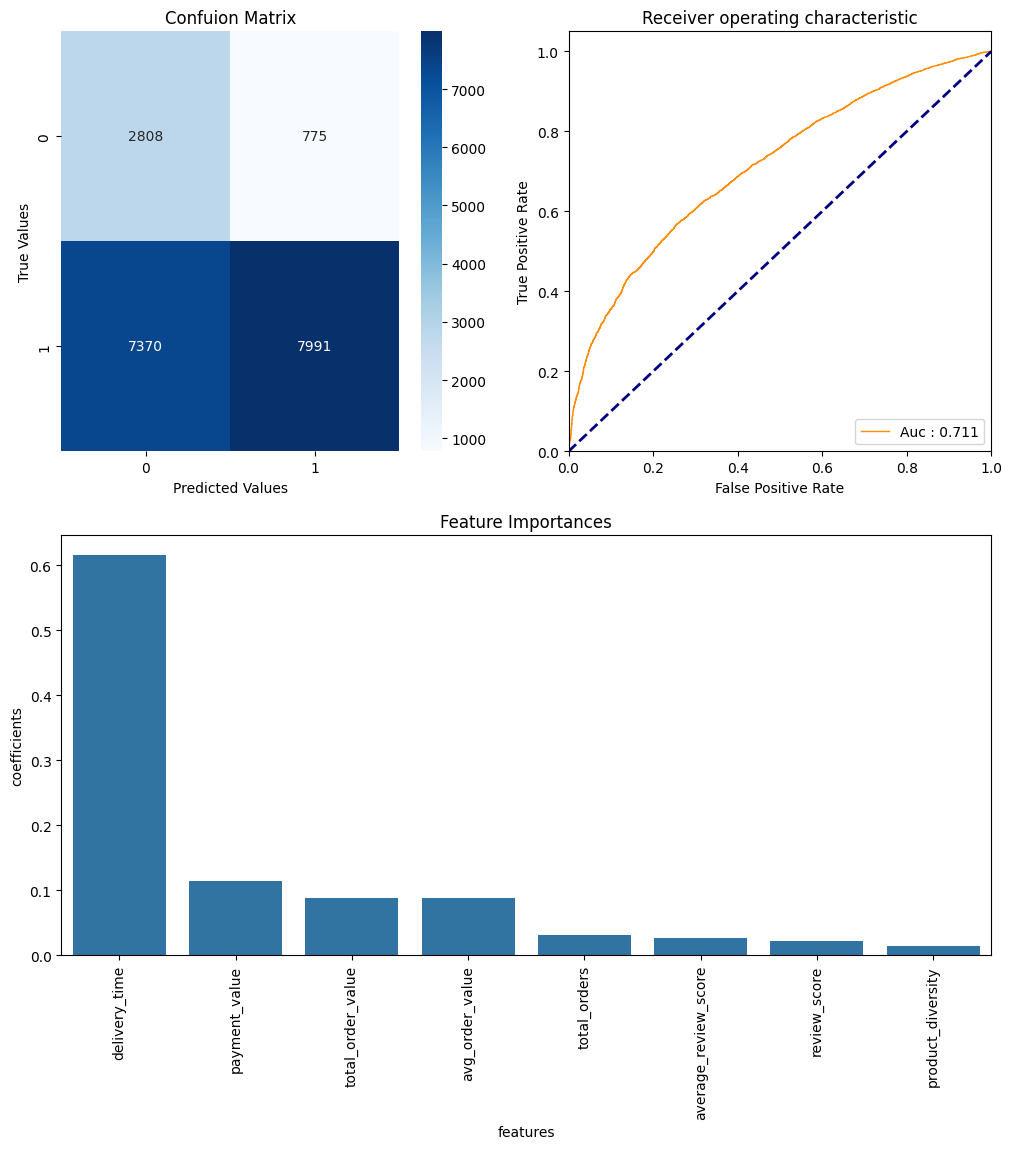

In [ ]:
churn_prediction(model, X_train, y_train, X_test, y_test, X.columns, "features")


# **Natural Language Processing**